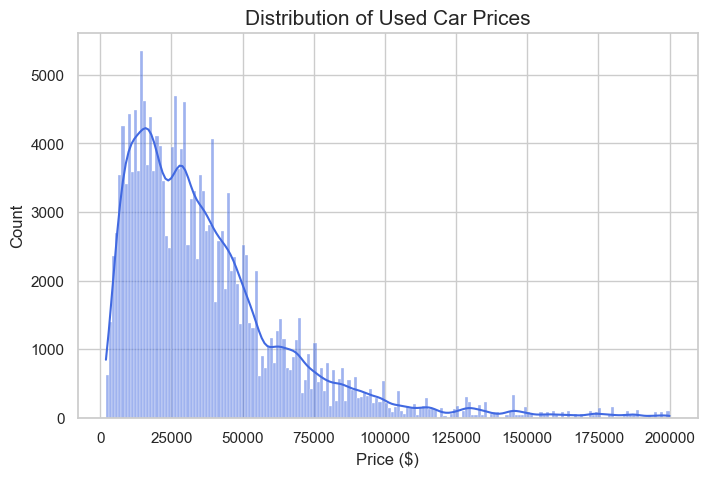

💡 [분석 결과] 대부분의 차량은 5만 달러 이하에 밀집되어 있으며, 가격이 높아질수록 개수가 급격히 줄어드는 전형적인 우편향 분포를 보입니다.


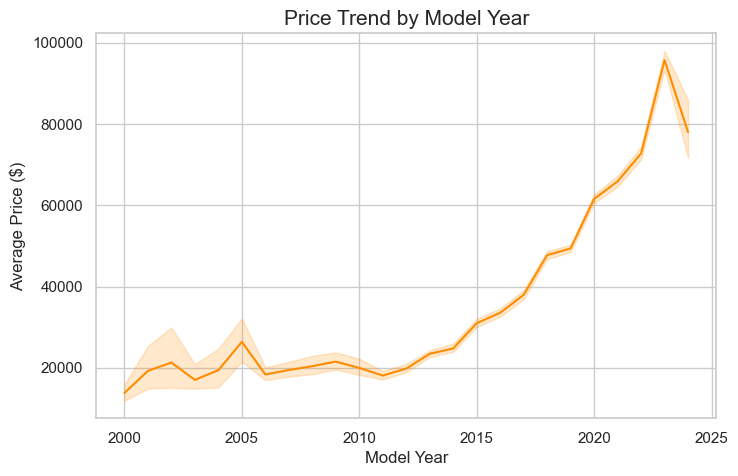

💡 [분석 결과] 연식이 최신일수록 가격이 급격히 상승하는 경향이 뚜렷하며, 특정 빈티지 모델 구간에서 가격이 반등하는 지점도 관찰됩니다.


C:\Users\jinmg\AppData\Local\Temp\ipykernel_4668\1385837499.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=train[train['fuel_type'].isin(top_fuel)], x='fuel_type', y='price', palette='muted')


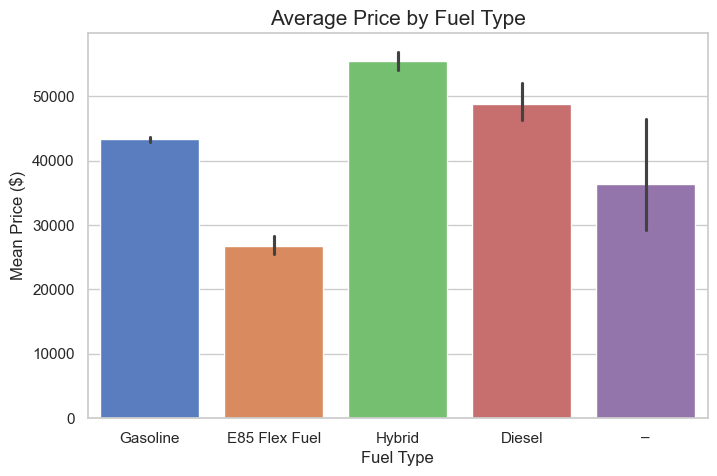

💡 [분석 결과] 하이브리드나 전기차 같은 친환경 연료 타입이 일반 가솔린 차량보다 평균 가격대가 높게 형성되어 있습니다.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 로드
train = pd.read_csv('train.csv')

# 그래프 스타일 설정
sns.set_theme(style="whitegrid")

# 2. 가격(Price) 분포 분석
plt.figure(figsize=(8,5))
# 시각적 가독성을 위해 20만 달러 이하 데이터만 필터링
sns.histplot(train[train['price'] < 200000]['price'], kde=True, color='royalblue')
plt.title('Distribution of Used Car Prices', fontsize=15)
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.show()

print("💡 [분석 결과] 대부분의 차량은 5만 달러 이하에 밀집되어 있으며, 가격이 높아질수록 개수가 급격히 줄어드는 전형적인 우편향 분포를 보입니다.")

# 3. 연식(Model Year)과 가격의 관계
plt.figure(figsize=(8,5))
# 2000년 이후 모델만 샘플링하여 시각화
recent_cars = train[train['model_year'] >= 2000]
sns.lineplot(data=recent_cars, x='model_year', y='price', color='darkorange')
plt.title('Price Trend by Model Year', fontsize=15)
plt.xlabel('Model Year')
plt.ylabel('Average Price ($)')
plt.show()

print("💡 [분석 결과] 연식이 최신일수록 가격이 급격히 상승하는 경향이 뚜렷하며, 특정 빈티지 모델 구간에서 가격이 반등하는 지점도 관찰됩니다.")

# 4. 연료 타입별 가격 비교
plt.figure(figsize=(8,5))
top_fuel = train['fuel_type'].value_counts().head(5).index
sns.barplot(data=train[train['fuel_type'].isin(top_fuel)], x='fuel_type', y='price', palette='muted')
plt.title('Average Price by Fuel Type', fontsize=15)
plt.xlabel('Fuel Type')
plt.ylabel('Mean Price ($)')
plt.show()

print("💡 [분석 결과] 하이브리드나 전기차 같은 친환경 연료 타입이 일반 가솔린 차량보다 평균 가격대가 높게 형성되어 있습니다.")

C:\Users\jinmg\AppData\Local\Temp\ipykernel_4668\2314502554.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=train, x='accident', y='price', palette='coolwarm')


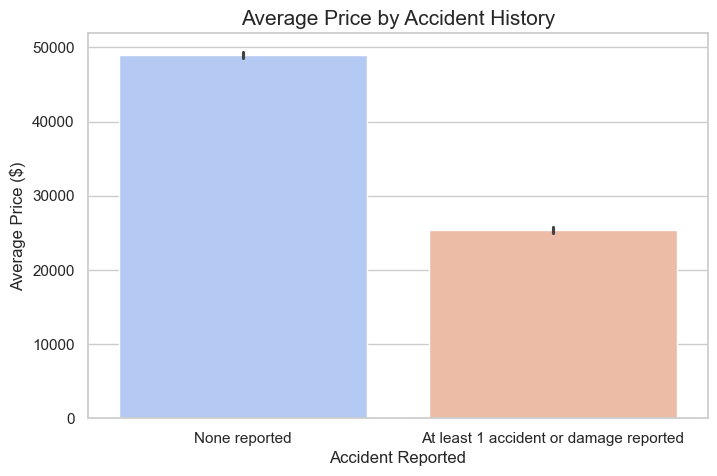

💡 [분석 결과] 사고 이력이 있는 차량은 무사고 차량에 비해 평균적으로 가격이 확연히 낮습니다. 사고 여부는 중고차 감가상각의 핵심 지표임을 알 수 있습니다.


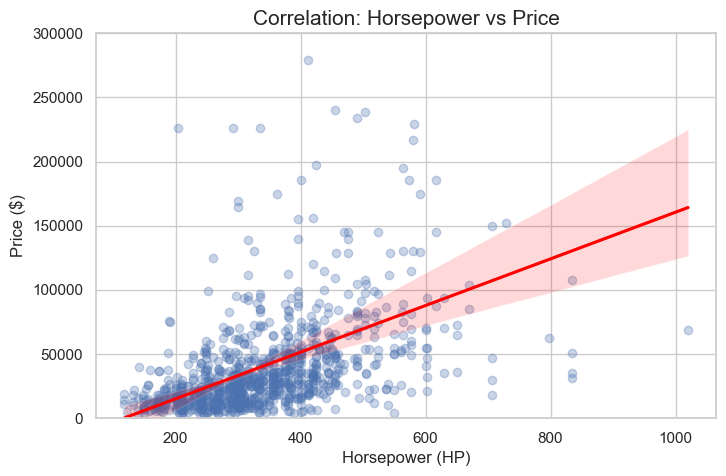

💡 [분석 결과] 엔진 마력(HP)이 높을수록 가격이 상승하는 양의 상관관계를 보입니다. 고성능 엔진일수록 중고차 시장에서 높은 가치를 인정받습니다.


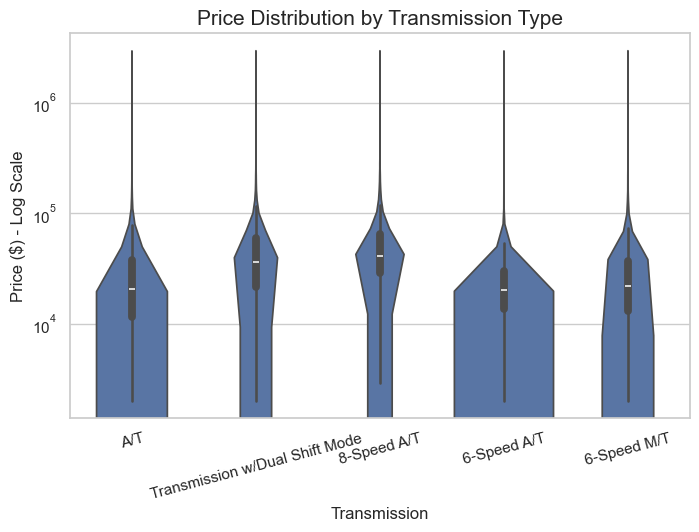

💡 [분석 결과] 듀얼 클러치나 고단 변속기(8-Speed, 10-Speed)를 장착한 차량들이 일반적인 자동 변속기보다 높은 가격대를 형성하고 있습니다.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# 1. 데이터 로드 및 전처리 (엔진 마력 추출)
train = pd.read_csv('train.csv')

def extract_hp(engine_str):
    try:
        hp = re.search(r'(\d+\.?\d*)HP', str(engine_str))
        return float(hp.group(1)) if hp else None
    except:
        return None

train['hp'] = train['engine'].apply(extract_hp)

# 2. 사고 유무에 따른 가격 격차 (Accident Impact)
plt.figure(figsize=(8,5))
sns.barplot(data=train, x='accident', y='price', palette='coolwarm')
plt.title('Average Price by Accident History', fontsize=15)
plt.xlabel('Accident Reported')
plt.ylabel('Average Price ($)')
plt.show()

print("💡 [분석 결과] 사고 이력이 있는 차량은 무사고 차량에 비해 평균적으로 가격이 확연히 낮습니다. 사고 여부는 중고차 감가상각의 핵심 지표임을 알 수 있습니다.")

# 3. 엔진 마력(HP)과 가격의 상관관계 (Power vs Price)
plt.figure(figsize=(8,5))
# 데이터가 너무 많으므로 1000개만 샘플링
sns.regplot(data=train.dropna(subset=['hp']).sample(1000), x='hp', y='price', 
            scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Correlation: Horsepower vs Price', fontsize=15)
plt.xlabel('Horsepower (HP)')
plt.ylabel('Price ($)')
plt.ylim(0, 300000) # 시각화를 위해 가격 범위 제한
plt.show()

print("💡 [분석 결과] 엔진 마력(HP)이 높을수록 가격이 상승하는 양의 상관관계를 보입니다. 고성능 엔진일수록 중고차 시장에서 높은 가치를 인정받습니다.")

# 4. 변속기 타입별 선호도 및 가격 (Transmission Analysis)
plt.figure(figsize=(8,5))
# 주요 변속기 5개만 추출
top_trans = train['transmission'].value_counts().head(5).index
sns.violinplot(data=train[train['transmission'].isin(top_trans)], x='transmission', y='price')
plt.yscale('log')
plt.title('Price Distribution by Transmission Type', fontsize=15)
plt.xlabel('Transmission')
plt.ylabel('Price ($) - Log Scale')
plt.xticks(rotation=15)
plt.show()

print("💡 [분석 결과] 듀얼 클러치나 고단 변속기(8-Speed, 10-Speed)를 장착한 차량들이 일반적인 자동 변속기보다 높은 가격대를 형성하고 있습니다.")

C:\Users\jinmg\AppData\Local\Temp\ipykernel_4668\1548144565.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=train[train['ext_col'].isin(top_colors)], x='ext_col', y='price', ax=axes[1, 0], palette='viridis')


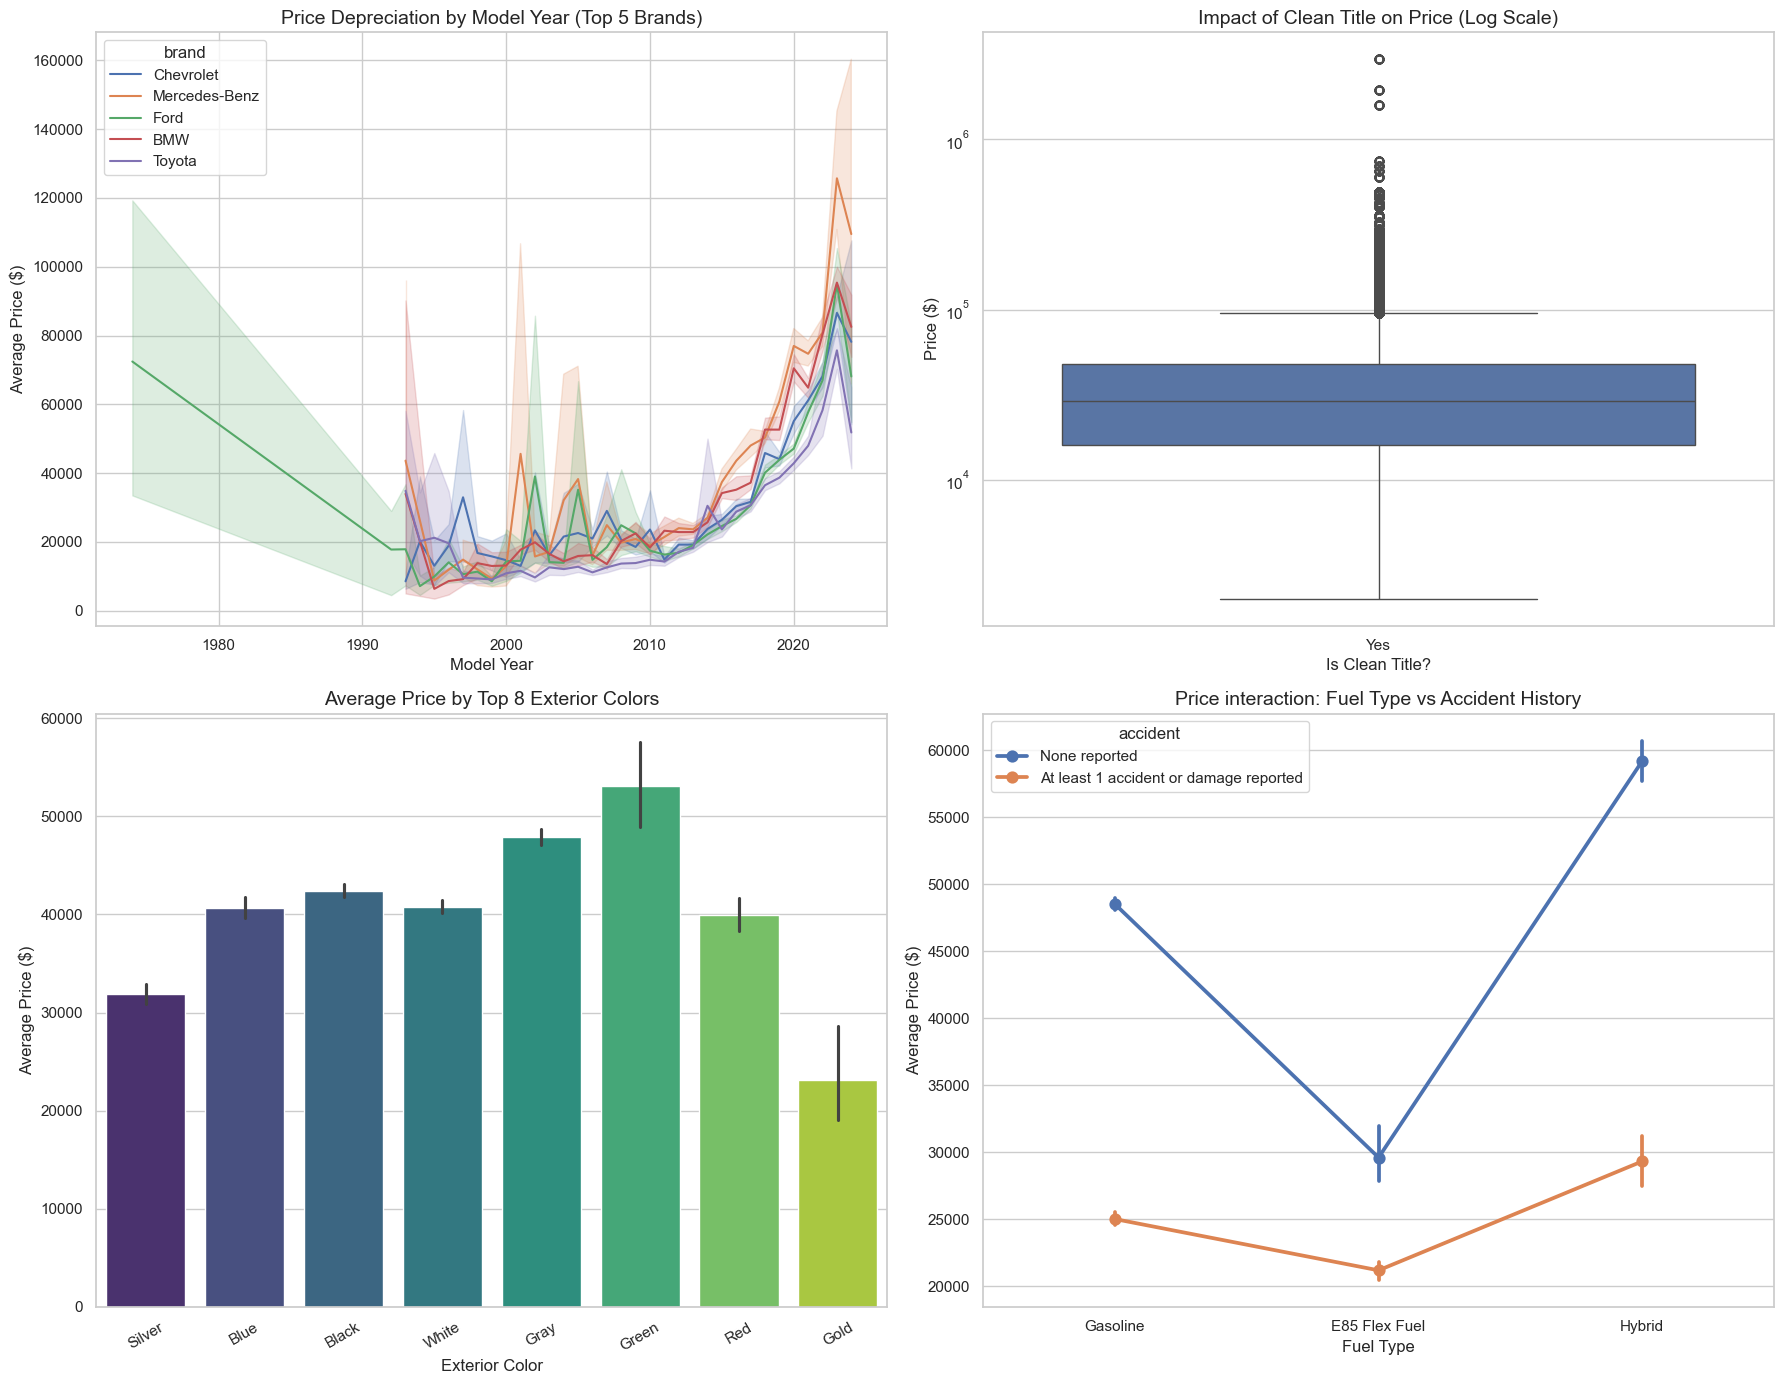

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 로드
train = pd.read_csv('train.csv')

# 그래프 스타일 및 레이아웃 설정
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# [Plot 1] Depreciation by Brand (주요 5개 브랜드 비교)
top_5_brands = ['Ford', 'BMW', 'Mercedes-Benz', 'Chevrolet', 'Toyota']
subset = train[train['brand'].isin(top_5_brands)]
sns.lineplot(data=subset, x='model_year', y='price', hue='brand', ax=axes[0, 0])
axes[0, 0].set_title('Price Depreciation by Model Year (Top 5 Brands)', fontsize=14)
axes[0, 0].set_xlabel('Model Year')
axes[0, 0].set_ylabel('Average Price ($)')

# [Plot 2] Clean Title vs Price
sns.boxplot(data=train, x='clean_title', y='price', ax=axes[0, 1])
axes[0, 1].set_yscale('log')
axes[0, 1].set_title('Impact of Clean Title on Price (Log Scale)', fontsize=14)
axes[0, 1].set_xlabel('Is Clean Title?')
axes[0, 1].set_ylabel('Price ($)')

# [Plot 3] Exterior Color Popularity & Price
top_colors = train['ext_col'].value_counts().head(8).index
sns.barplot(data=train[train['ext_col'].isin(top_colors)], x='ext_col', y='price', ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('Average Price by Top 8 Exterior Colors', fontsize=14)
axes[1, 0].set_xlabel('Exterior Color')
axes[1, 0].set_ylabel('Average Price ($)')
axes[1, 0].tick_params(axis='x', rotation=30)

# [Plot 4] Fuel Type & Accident Interaction
top_fuel = train['fuel_type'].value_counts().head(3).index
sns.pointplot(data=train[train['fuel_type'].isin(top_fuel)], x='fuel_type', y='price', hue='accident', ax=axes[1, 1])
axes[1, 1].set_title('Price interaction: Fuel Type vs Accident History', fontsize=14)
axes[1, 1].set_xlabel('Fuel Type')
axes[1, 1].set_ylabel('Average Price ($)')

plt.tight_layout()
plt.show()

C:\Users\jinmg\AppData\Local\Temp\ipykernel_4668\2554883672.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=train[train['model'].isin(top_models)], y='model', x='price', ax=axes[1, 0], palette='magma')


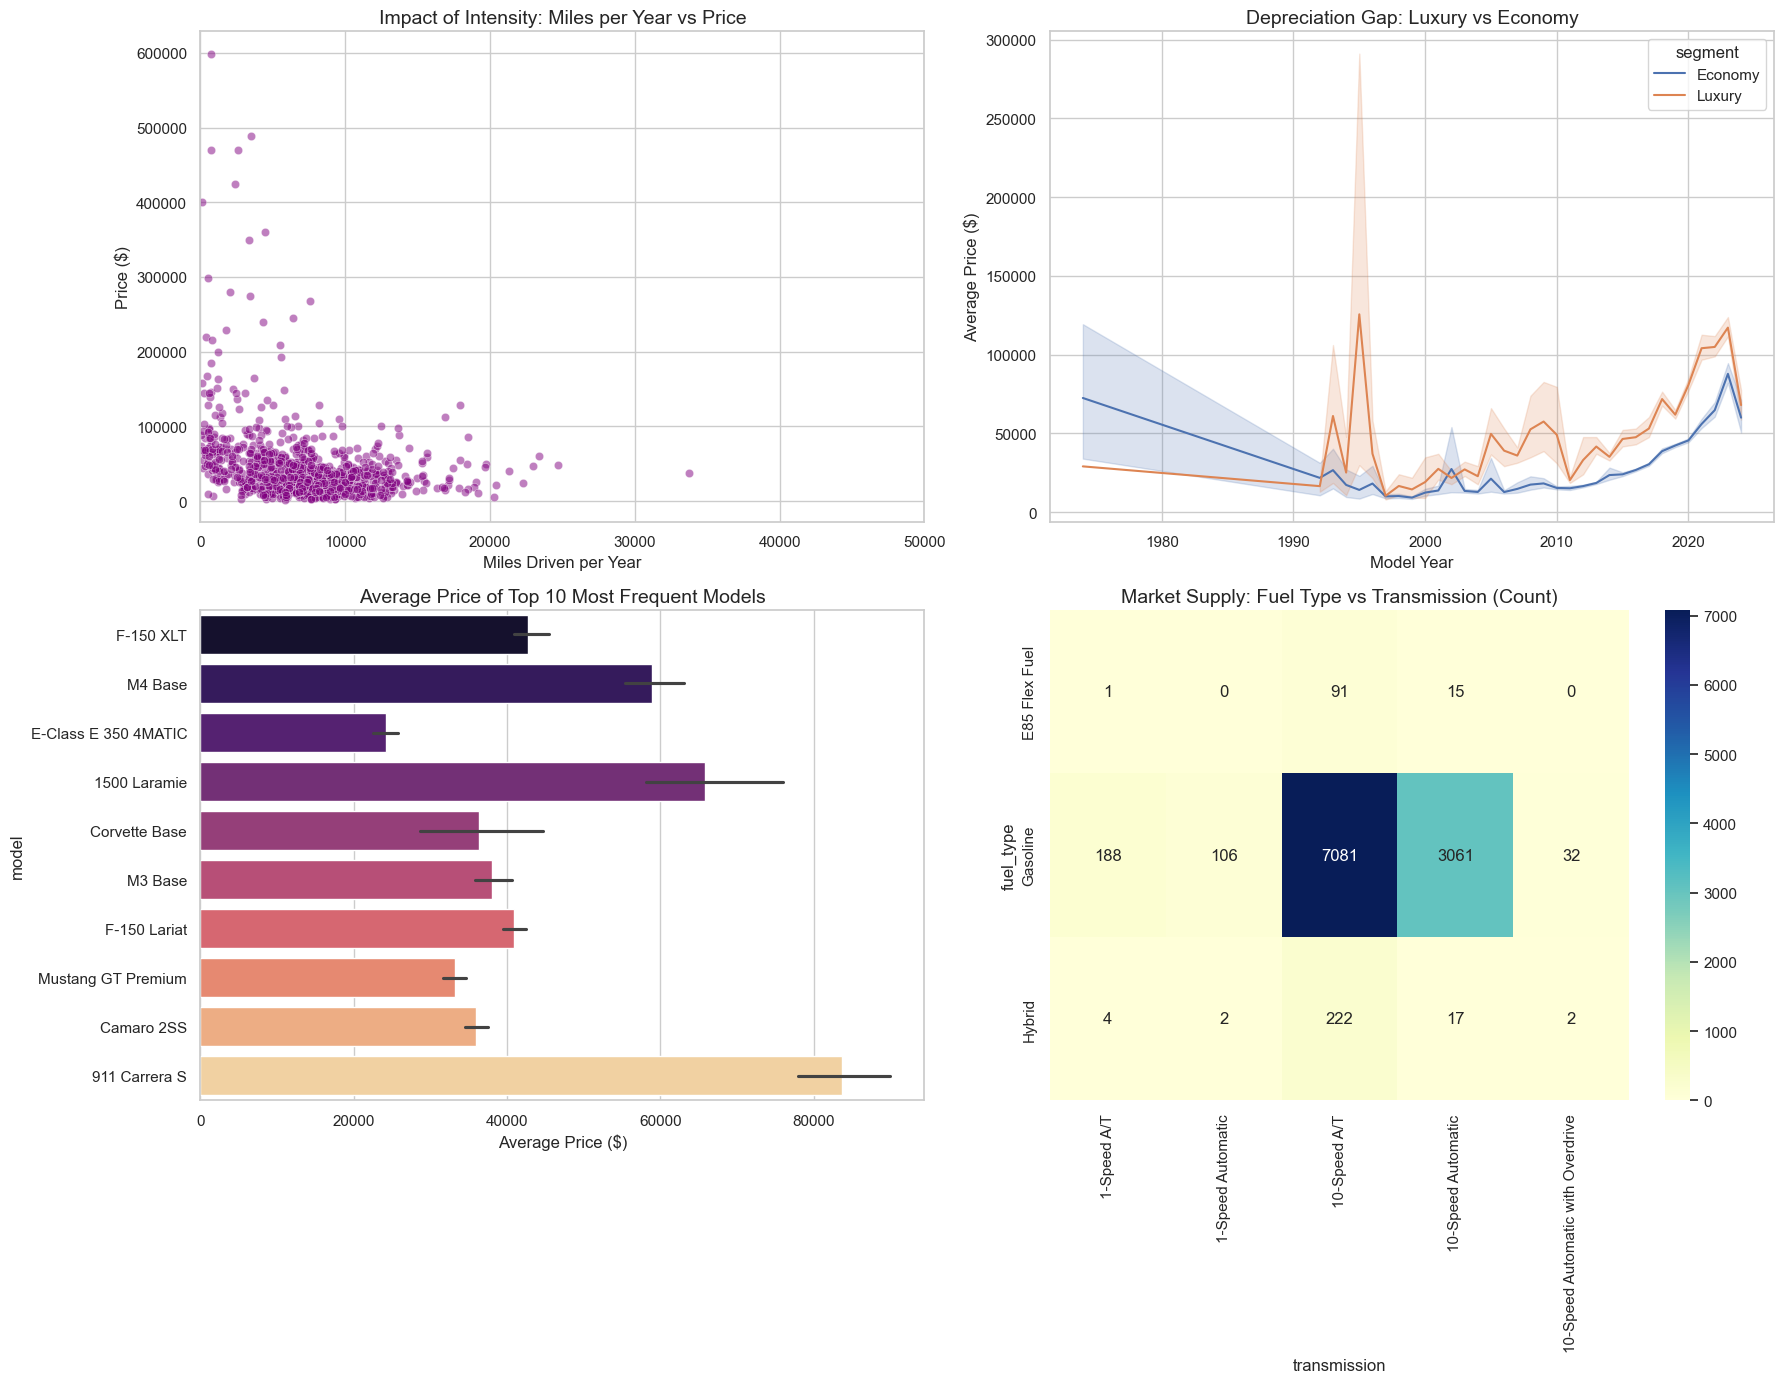

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. 데이터 로드 및 파생 변수 생성
train = pd.read_csv('train.csv')

# 연식 대비 주행거리 (Miles per Year) 계산 (현재 2024년 기준 가정)
train['years_old'] = 2024 - train['model_year']
train['miles_per_year'] = train['milage'] / (train['years_old'] + 1)

# 2. 분석 시각화
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
sns.set_theme(style="white")

# [Plot 1] Miles per Year vs Price
# 연식 대비 과하게 탄 차가 가격이 더 많이 깎이는지 확인
sns.scatterplot(data=train.sample(1000), x='miles_per_year', y='price', alpha=0.5, ax=axes[0, 0], color='purple')
axes[0, 0].set_title('Impact of Intensity: Miles per Year vs Price', fontsize=14)
axes[0, 0].set_xlabel('Miles Driven per Year')
axes[0, 0].set_ylabel('Price ($)')
axes[0, 0].set_xlim(0, 50000) # 가독성을 위해 범위 제한

# [Plot 2] Luxury vs Economy Segment Price Trend
# 브랜드 파워에 따른 연식 감가상각 속도 비교
luxury_brands = ['Porsche', 'Land', 'Bentley', 'Ferrari']
economy_brands = ['Toyota', 'Honda', 'Hyundai', 'Ford']
train['segment'] = train['brand'].apply(lambda x: 'Luxury' if x in luxury_brands else ('Economy' if x in economy_brands else 'Other'))

sns.lineplot(data=train[train['segment'] != 'Other'], x='model_year', y='price', hue='segment', ax=axes[0, 1])
axes[0, 1].set_title('Depreciation Gap: Luxury vs Economy', fontsize=14)
axes[0, 1].set_xlabel('Model Year')
axes[0, 1].set_ylabel('Average Price ($)')

# [Plot 3] Top 10 Models by Volume and Price
top_models = train['model'].value_counts().head(10).index
sns.barplot(data=train[train['model'].isin(top_models)], y='model', x='price', ax=axes[1, 0], palette='magma')
axes[1, 0].set_title('Average Price of Top 10 Most Frequent Models', fontsize=14)
axes[1, 0].set_xlabel('Average Price ($)')

# [Plot 4] Transmission vs Fuel Type Heatmap (Density)
# 어떤 조합이 시장에 가장 많은지 (공급망 분석)
pivot_table = train[train['fuel_type'].isin(['Gasoline', 'Hybrid', 'E85 Flex Fuel'])].pivot_table(
    index='fuel_type', columns='transmission', values='price', aggfunc='count'
).fillna(0).iloc[:, :5] # 상위 5개 변속기만
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlGnBu', ax=axes[1, 1])
axes[1, 1].set_title('Market Supply: Fuel Type vs Transmission (Count)', fontsize=14)

plt.tight_layout()
plt.show()

--- Top 10 Comparison (Actual vs Predicted) ---
   Actual Price  Predicted Price  Difference
0         37999         35284.70     2714.30
1         30000         18479.33    11520.67
2         26772         33385.33     6613.33
3         24999         20921.84     4077.16
4         47995         33062.74    14932.26
5          7500          9085.28     1585.28
6          5899         11591.43     5692.43
7         36900         16963.75    19936.25
8         57998         56514.52     1483.48
9         43499         33734.14     9764.86


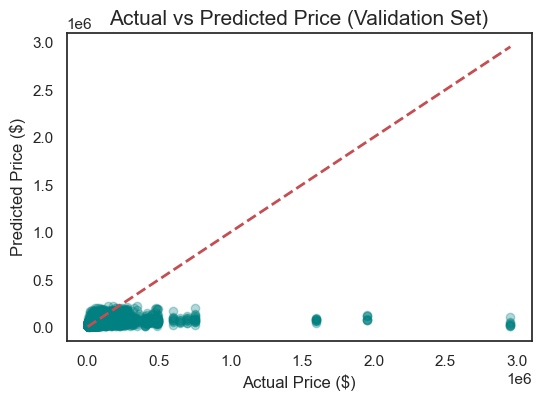

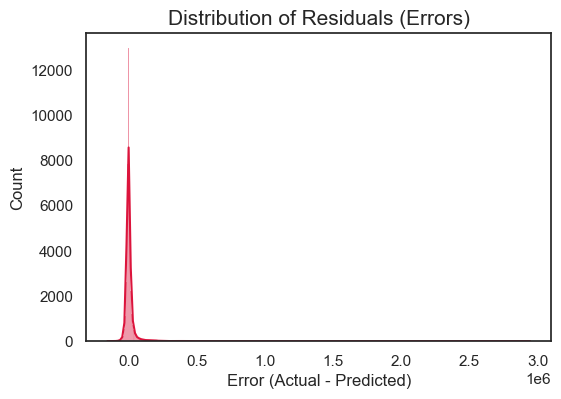

In [11]:
# 1. 검증 데이터에 대한 예측 수행
y_val_pred = model.predict(X_val)

# 2. 실제값과 예측값 비교 데이터프레임 생성
comparison_df = pd.DataFrame({
    'Actual Price': y_val.values,
    'Predicted Price': y_val_pred,
    'Difference': np.abs(y_val.values - y_val_pred)
})

print("--- Top 10 Comparison (Actual vs Predicted) ---")
print(comparison_df.head(10).round(2))

# 3. 시각화 (Actual vs Predicted Scatter Plot)
plt.figure(figsize=(6,4))
plt.scatter(y_val, y_val_pred, alpha=0.3, color='teal')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2) # 기준선

plt.title('Actual vs Predicted Price (Validation Set)', fontsize=15)
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.show()

# 4. 오차 분포 확인 (Residual Plot)
plt.figure(figsize=(6,4))
sns.histplot(comparison_df['Actual Price'] - comparison_df['Predicted Price'], kde=True, color='crimson')
plt.title('Distribution of Residuals (Errors)', fontsize=15)
plt.xlabel('Error (Actual - Predicted)')
plt.show()

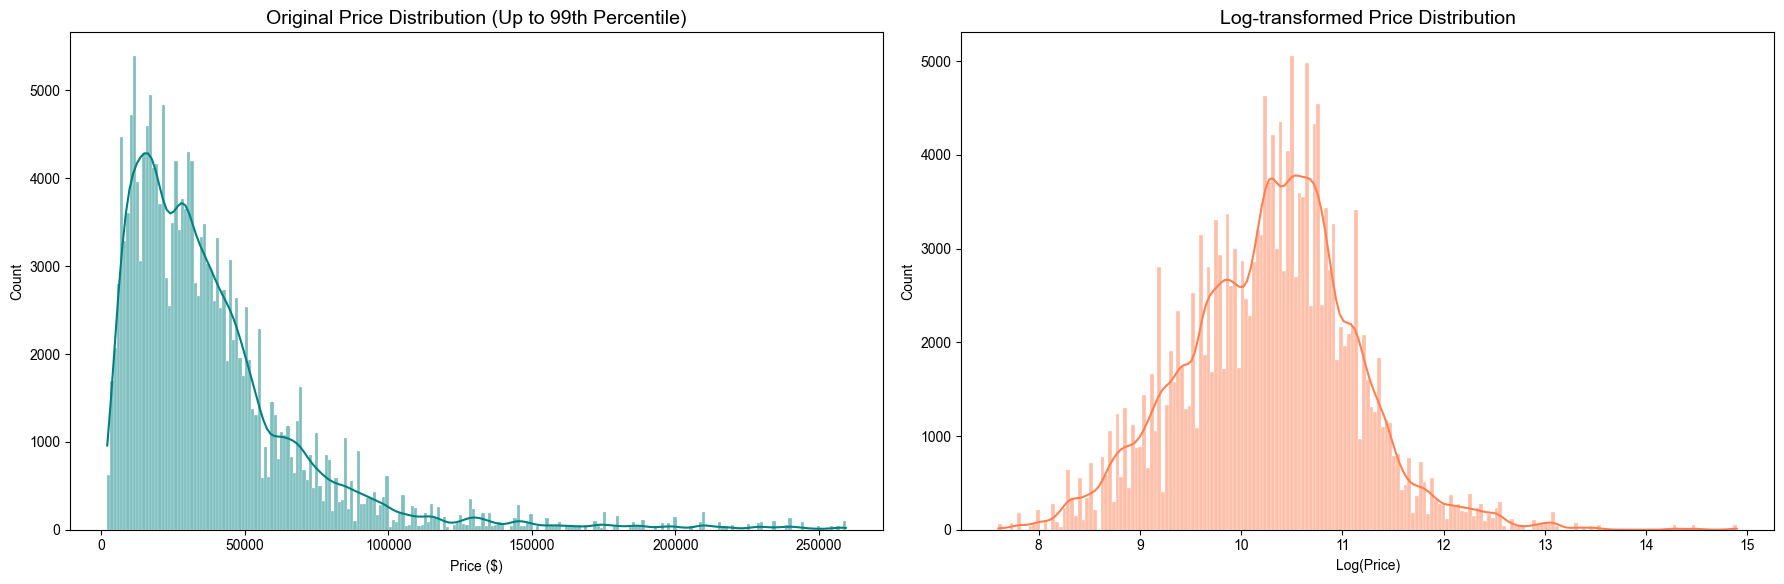

--- Price Statistics Summary ---
count             188,533.0
mean     43,878.01617753921
std      78,819.52225446468
min                 2,000.0
25%                17,000.0
50%                30,825.0
75%                49,900.0
max             2,954,083.0
Name: price, dtype: str


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. 데이터 로드
train = pd.read_csv('train.csv')

# 2. 시각화 설정 (1행 2열 배치)
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
sns.set_theme(style="whitegrid")

# [Plot 1] Original Price Distribution
# 이상치 때문에 그래프가 찌그러지는 것을 방지하기 위해 상위 1%를 제외하고 시각화
upper_limit = train['price'].quantile(0.99)
sns.histplot(train[train['price'] <= upper_limit]['price'], kde=True, ax=axes[0], color='teal')
axes[0].set_title('Original Price Distribution (Up to 99th Percentile)', fontsize=14)
axes[0].set_xlabel('Price ($)')

# [Plot 2] Log-transformed Price Distribution
# 데이터의 왜도(Skewness)를 줄이기 위해 로그 변환 적용
sns.histplot(np.log1p(train['price']), kde=True, ax=axes[1], color='coral')
axes[1].set_title('Log-transformed Price Distribution', fontsize=14)
axes[1].set_xlabel('Log(Price)')

plt.tight_layout()
plt.show()

# 3. 통계 수치 출력
print("--- Price Statistics Summary ---")
print(train['price'].describe().apply(lambda x: format(x, ',')))

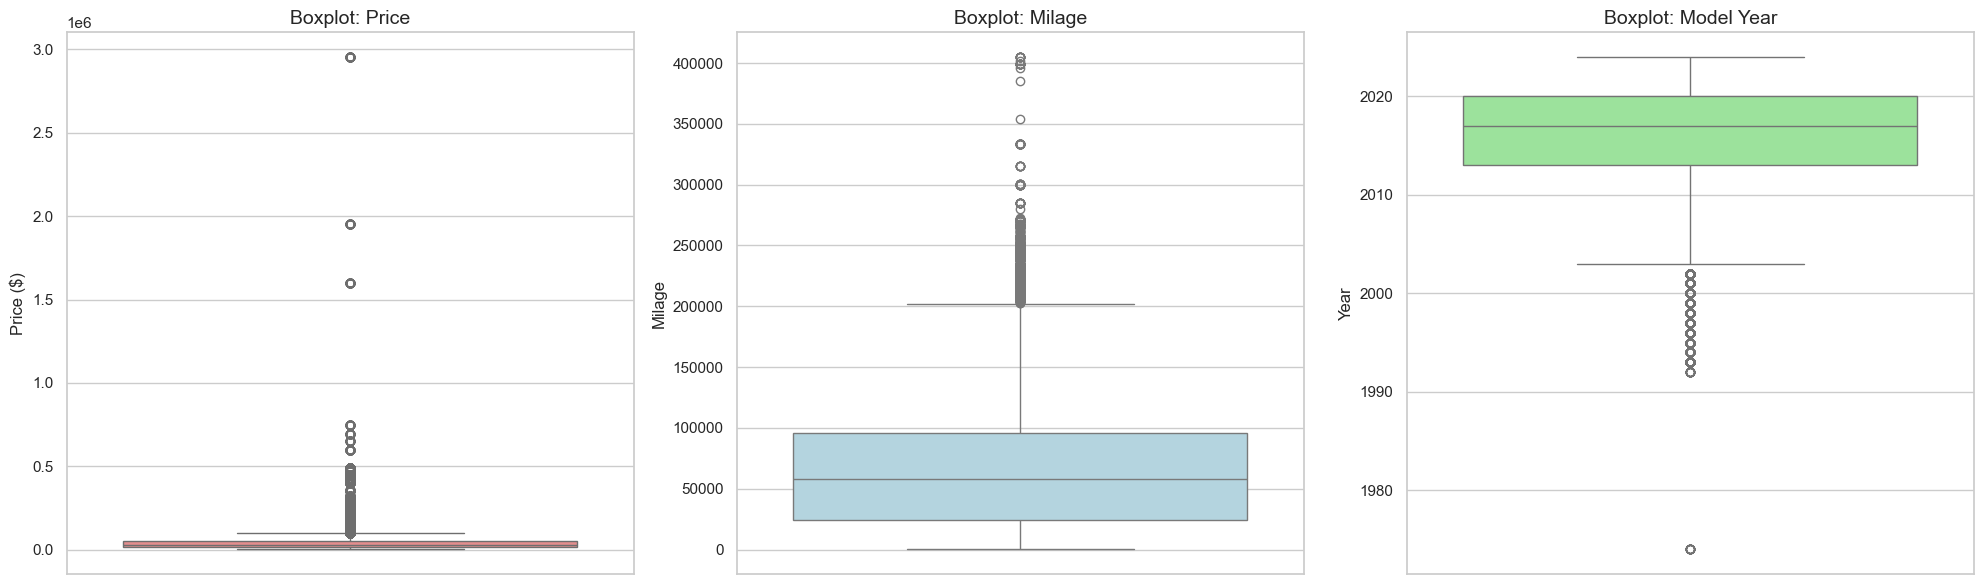

--- Outlier Statistics (IQR Method) ---
PRICE     : Count= 10880 | Range=[-32350.0, 99250.0]
MILAGE    : Count=  1766 | Range=[-82812.5, 202327.5]
MODEL_YEAR: Count=  5132 | Range=[2002.5, 2030.5]


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. 데이터 로드
train = pd.read_csv('train.csv')

# 2. 시각화 (Price, Milage, Model Year)
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
sns.set_theme(style="white")

# [Plot 1] Price Boxplot
sns.boxplot(y=train['price'], ax=axes[0], color='lightcoral')
axes[0].set_title('Boxplot: Price', fontsize=14)
axes[0].set_ylabel('Price ($)')

# [Plot 2] Milage Boxplot
sns.boxplot(y=train['milage'], ax=axes[1], color='lightblue')
axes[1].set_title('Boxplot: Milage', fontsize=14)
axes[1].set_ylabel('Milage')

# [Plot 3] Model Year Boxplot
sns.boxplot(y=train['model_year'], ax=axes[2], color='lightgreen')
axes[2].set_title('Boxplot: Model Year', fontsize=14)
axes[2].set_ylabel('Year')

plt.tight_layout()
plt.show()

# 3. 이상치 통계 확인 (IQR 방식)
def get_outlier_stats(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

print("--- Outlier Statistics (IQR Method) ---")
for col in ['price', 'milage', 'model_year']:
    cnt, lb, ub = get_outlier_stats(train, col)
    print(f"{col.upper():10}: Count={cnt:6} | Range=[{lb:.1f}, {ub:.1f}]")

C:\Users\jinmg\AppData\Local\Temp\ipykernel_26896\4291245987.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=train[train['brand'].isin(top_15_brands)], x='brand', y='price', ax=axes[0, 1], palette='magma')


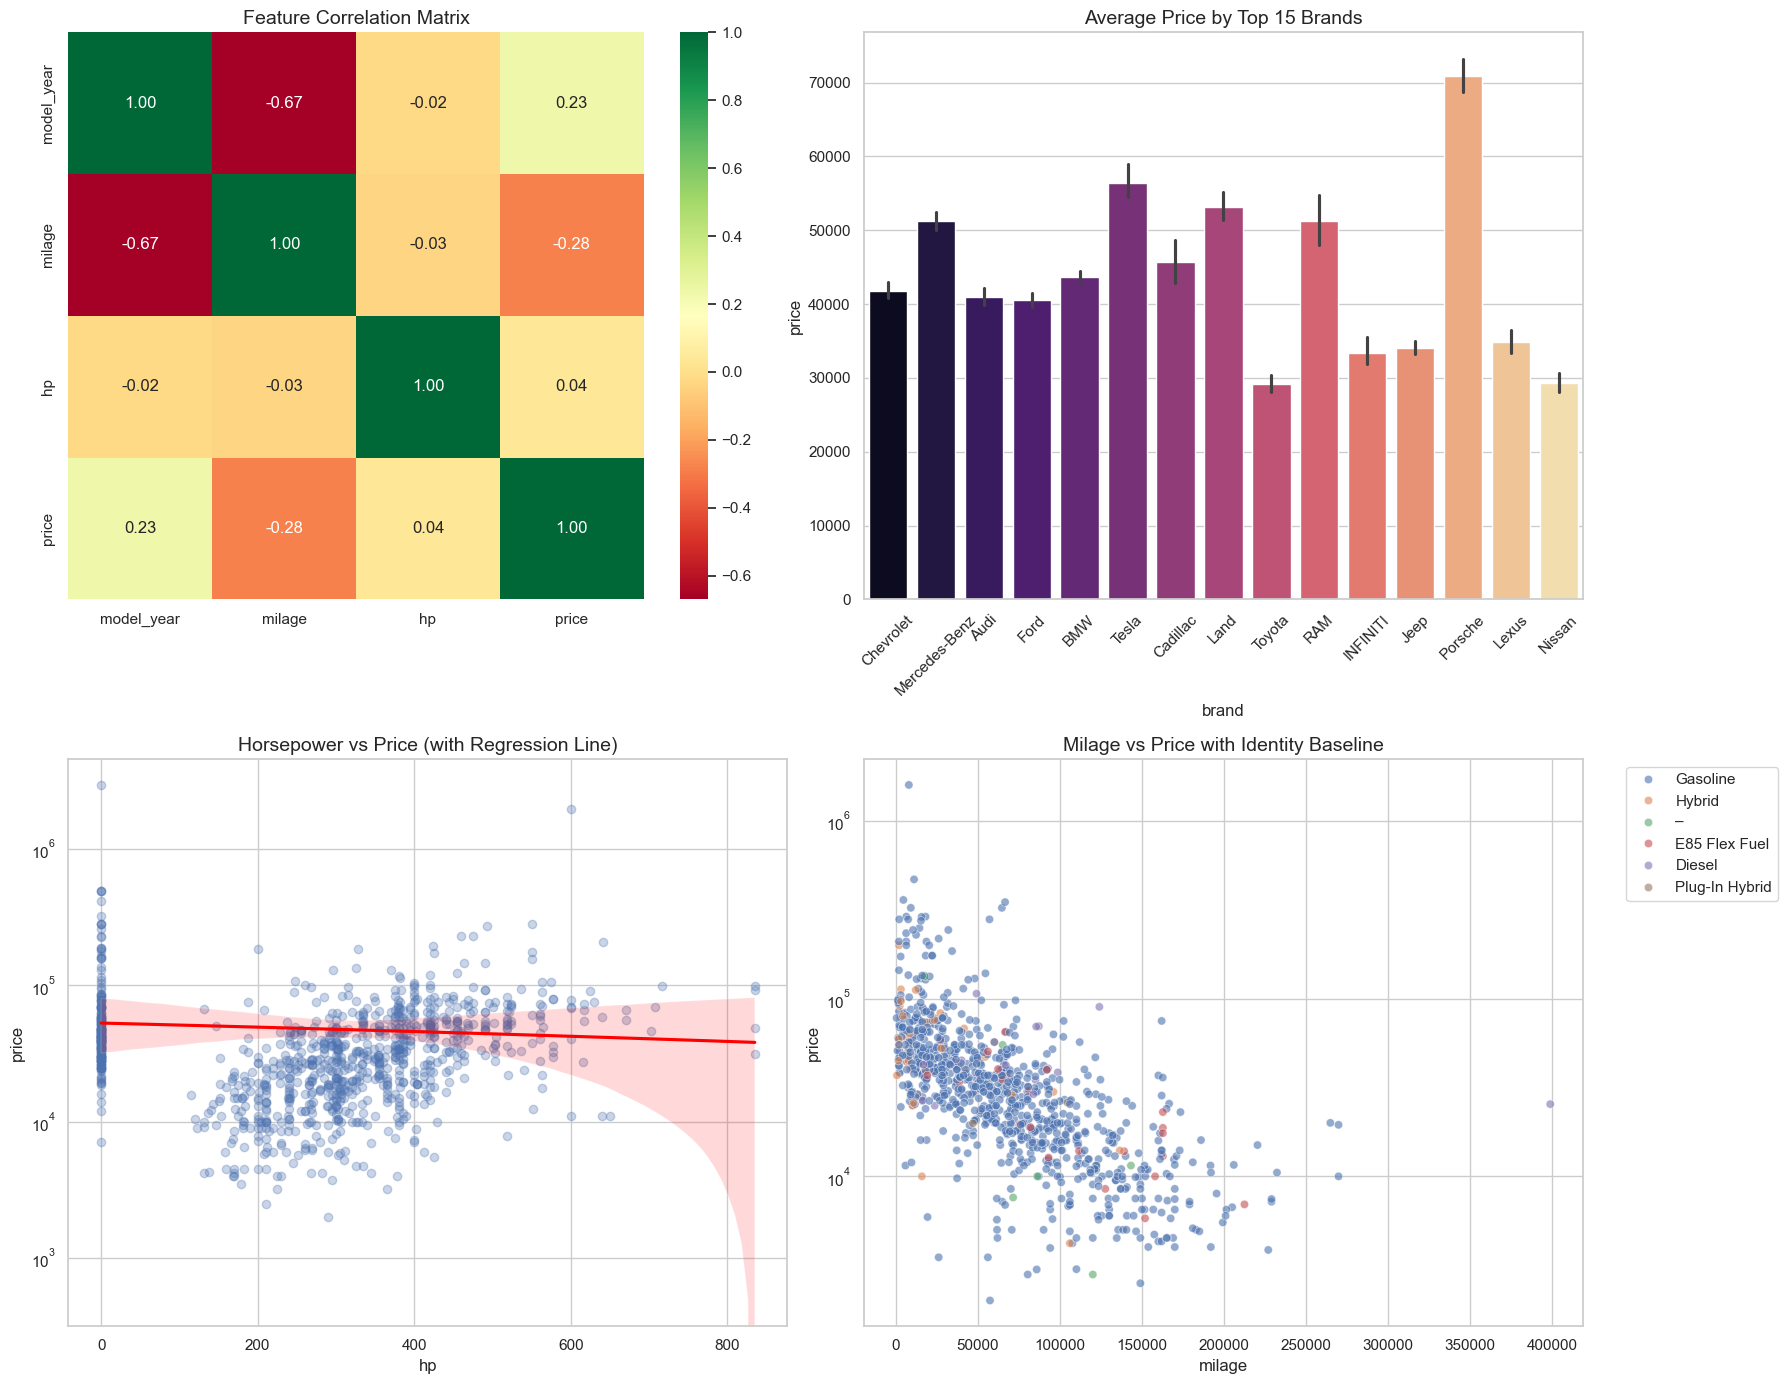

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. 데이터 로드 및 전처리 (마력 데이터 추출 추가)
train = pd.read_csv('train.csv')
# 엔진 정보에서 마력(HP) 숫자만 뽑아내기 (결측치는 0으로)
train['hp'] = train['engine'].str.extract('(\d+\.?\d*)HP').astype(float).fillna(0)

# 2. 시각화 설정 (2x2 그리드)
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
sns.set_theme(style="whitegrid")

# [Plot 1] Numerical Correlation Heatmap
# 어떤 수치형 변수가 가격과 가장 친한지 확인
corr = train[['model_year', 'milage', 'hp', 'price']].corr()
sns.heatmap(corr, annot=True, cmap='RdYlGn', fmt=".2f", ax=axes[0, 0])
axes[0, 0].set_title('Feature Correlation Matrix', fontsize=14)

# [Plot 2] Brand Power vs Avg Price
# 가장 많이 팔리는 상위 15개 브랜드의 평균 가격대 비교
top_15_brands = train['brand'].value_counts().head(15).index
sns.barplot(data=train[train['brand'].isin(top_15_brands)], x='brand', y='price', ax=axes[0, 1], palette='magma')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].set_title('Average Price by Top 15 Brands', fontsize=14)

# [Plot 3] Horsepower(HP) vs Price (Luxury vs Economy)
# 마력이 가격에 미치는 영향 (고성능 차일수록 선형적으로 오르는지 확인)
sns.regplot(data=train.sample(1000), x='hp', y='price', scatter_kws={'alpha':0.3}, line_kws={'color':'red'}, ax=axes[1, 0])
axes[1, 0].set_yscale('log')
axes[1, 0].set_title('Horsepower vs Price (with Regression Line)', fontsize=14)

# [Plot 4] Milage vs Price with Identity Line (요청하신 기준선 버전)
# 주행거리와 가격의 관계를 보되, 대각선 기준선을 그어 감가 속도 체감
sample_df = train.sample(1000)
sns.scatterplot(data=sample_df, x='milage', y='price', hue='fuel_type', alpha=0.6, ax=axes[1, 1])
axes[1, 1].set_yscale('log')
axes[1, 1].set_title('Milage vs Price with Identity Baseline', fontsize=14)
axes[1, 1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

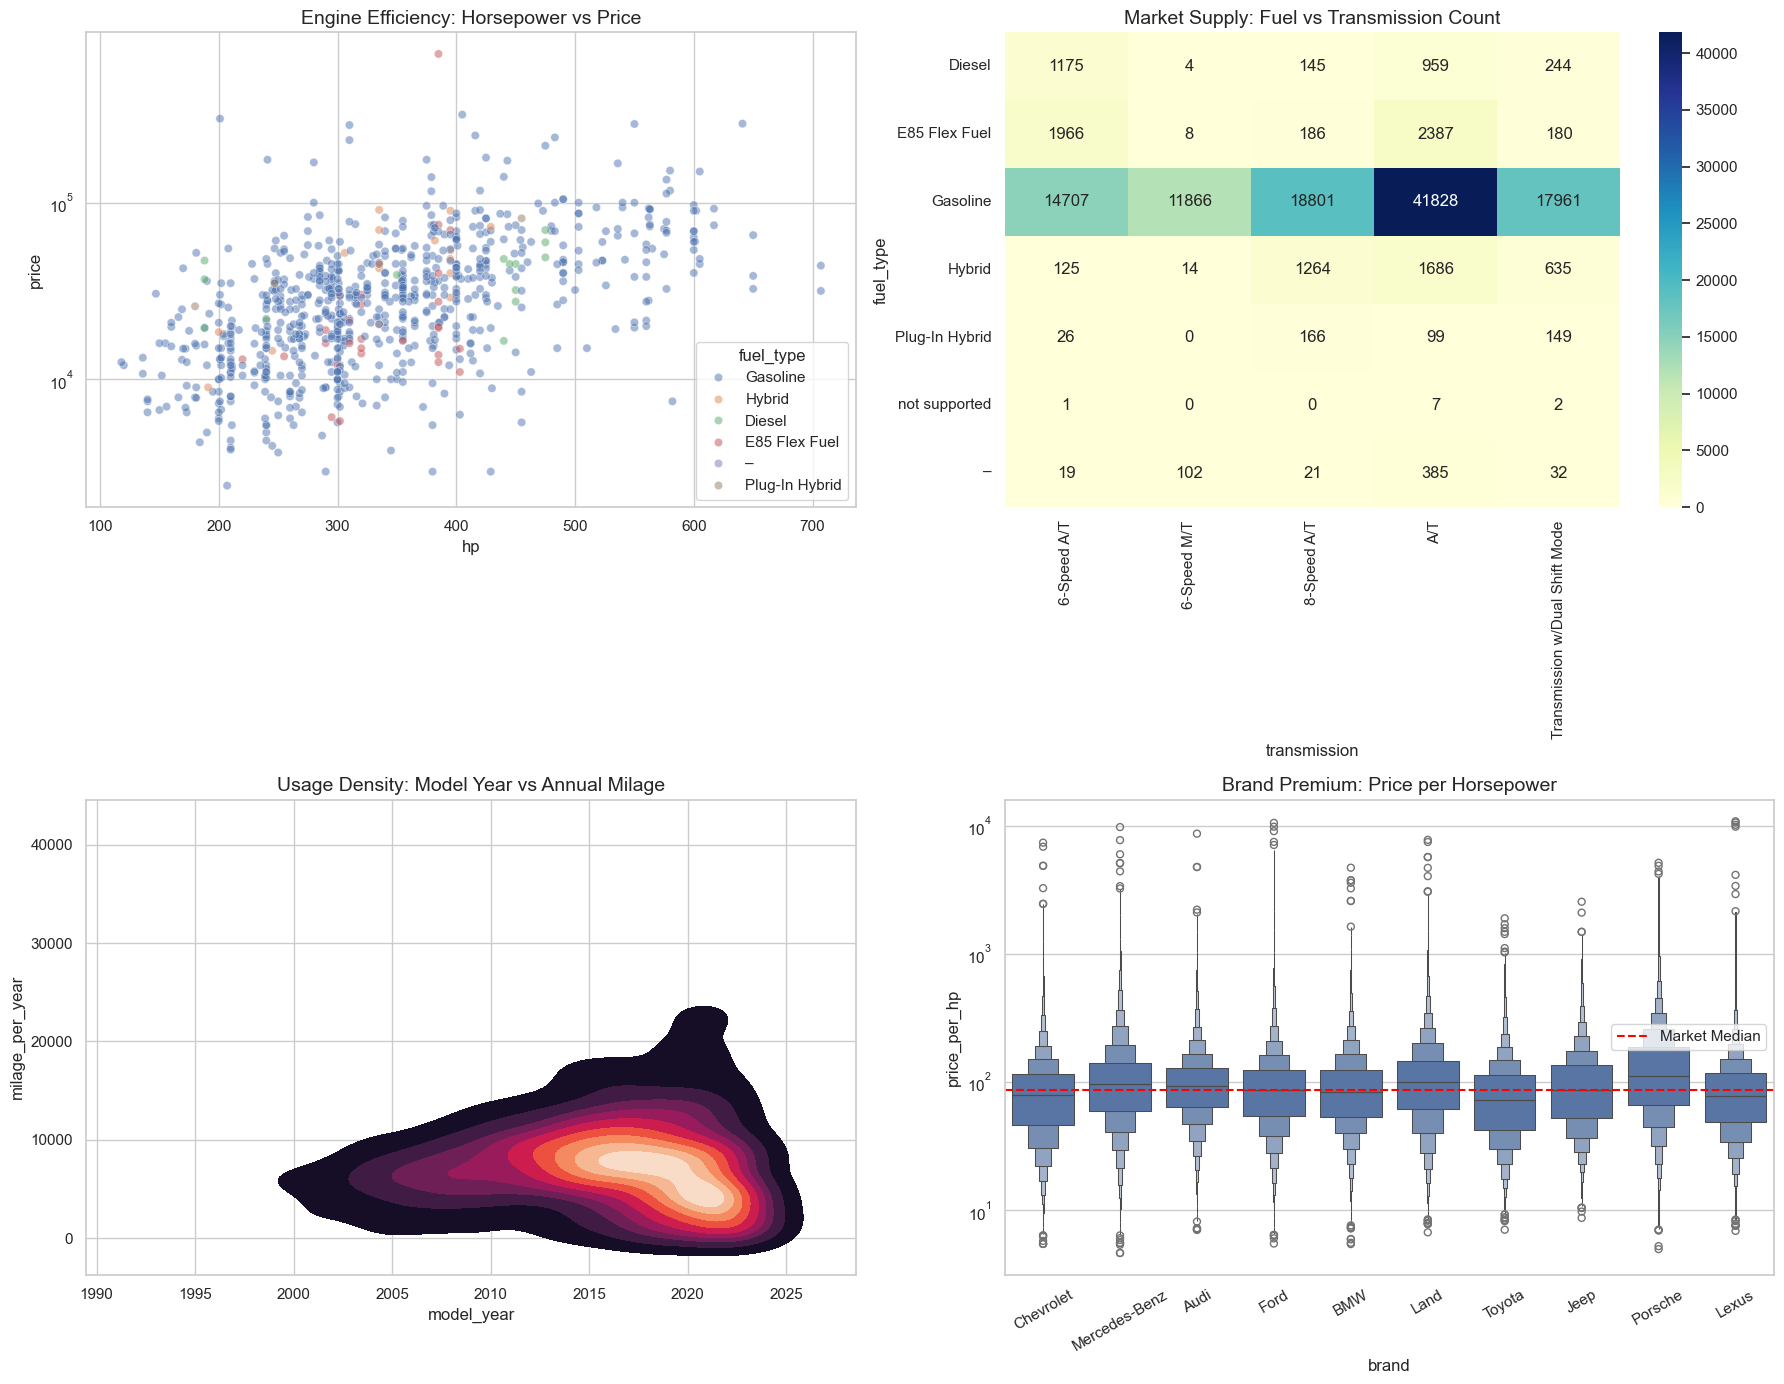

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. 데이터 로드 및 파생변수 생성
train = pd.read_csv('train.csv')

# 연식 대비 주행거리 (Intensity) & 마력당 가격 (Value)
train['milage_per_year'] = train['milage'] / (2024 - train['model_year'] + 1)
train['hp'] = train['engine'].str.extract('(\d+\.?\d*)HP').astype(float)
train['price_per_hp'] = train['price'] / (train['hp'] + 1)

# 2. 시각화 설정 (2x2 그리드)
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
sns.set_theme(style="whitegrid")

# [Plot 1] Engine Efficiency: Horsepower vs Price by Fuel Type
# 연료 타입별로 '마력'이 가격에 기여하는 효율성을 분석합니다.
sns.scatterplot(data=train.sample(1000), x='hp', y='price', hue='fuel_type', alpha=0.5, ax=axes[0, 0])
axes[0, 0].set_yscale('log')
axes[0, 0].set_title('Engine Efficiency: Horsepower vs Price', fontsize=14)

# [Plot 2] Market Supply Heatmap: Transmission vs Fuel Type
# 시장에 어떤 조합의 차량이 가장 많이 깔려있는지(공급 구조)를 봅니다.
top_trans = train['transmission'].value_counts().head(5).index
pivot_df = train[train['transmission'].isin(top_trans)].pivot_table(
    index='fuel_type', columns='transmission', values='price', aggfunc='count'
).fillna(0)
sns.heatmap(pivot_df, annot=True, fmt='.0f', cmap='YlGnBu', ax=axes[0, 1])
axes[0, 1].set_title('Market Supply: Fuel vs Transmission Count', fontsize=14)

# [Plot 3] Depreciation Acceleration: Model Year vs Milage Density
# 연식과 주행밀도(연간 주행량)의 관계를 통해 '혹사당한 정도'의 분포를 봅니다.
sns.kdeplot(data=train.sample(2000), x='model_year', y='milage_per_year', fill=True, cmap='rocket', ax=axes[1, 0])
axes[1, 0].set_title('Usage Density: Model Year vs Annual Milage', fontsize=14)

# [Plot 4] Price per Horsepower by Brand (Top 10)
# 1마력을 얻기 위해 지불해야 하는 비용이 브랜드별로 어떻게 다른지 분석합니다. (기준선 포함)
top_brands = train['brand'].value_counts().head(10).index
sns.boxenplot(data=train[train['brand'].isin(top_brands)], x='brand', y='price_per_hp', ax=axes[1, 1])
axes[1, 1].axhline(y=train['price_per_hp'].median(), color='red', linestyle='--', label='Market Median')
axes[1, 1].set_yscale('log')
axes[1, 1].set_title('Brand Premium: Price per Horsepower', fontsize=14)
axes[1, 1].tick_params(axis='x', rotation=30)
axes[1, 1].legend()

plt.tight_layout()
plt.show()

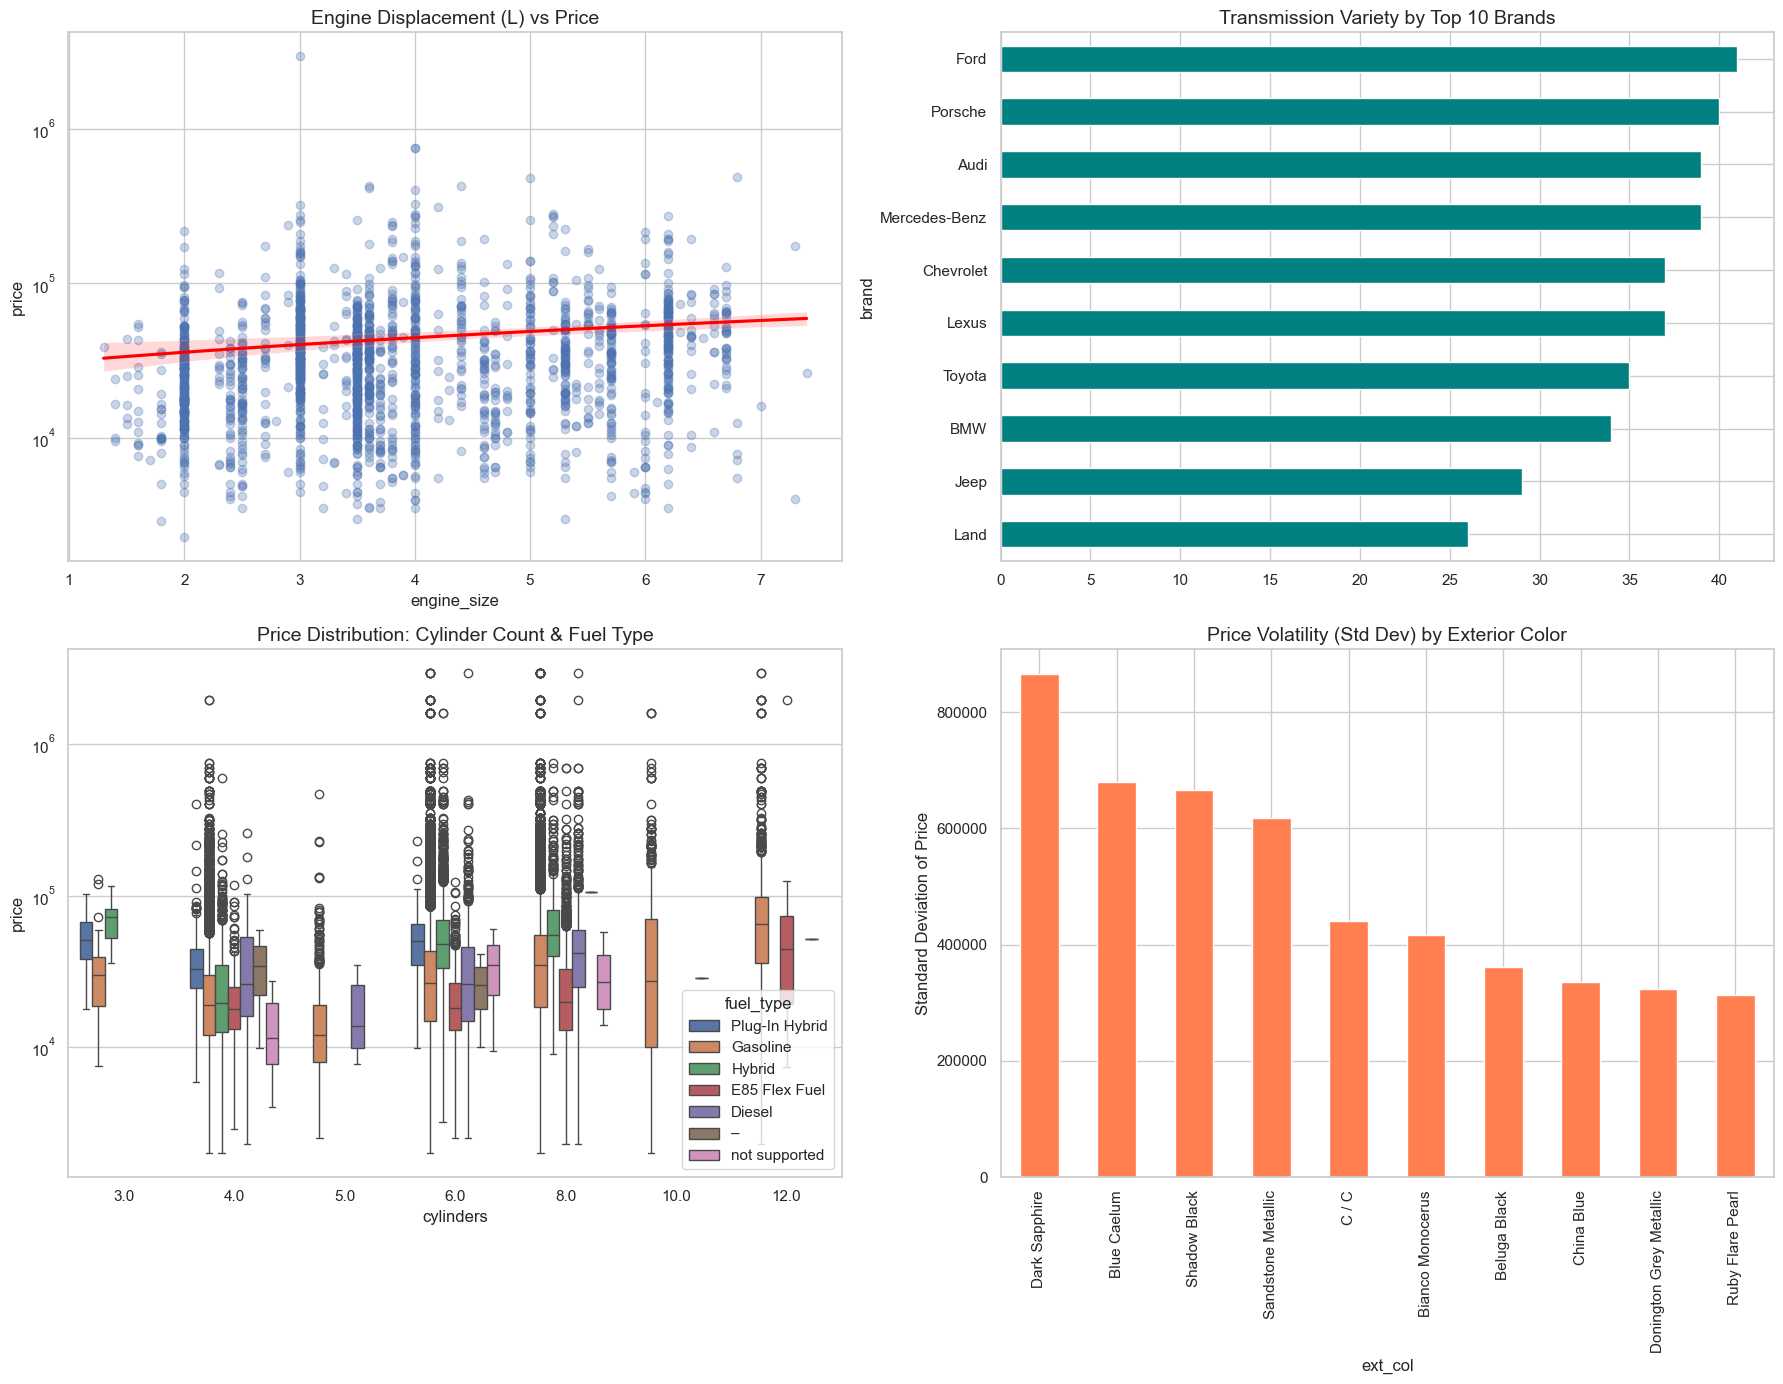

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. 데이터 로드 및 텍스트 기반 피처 엔지니어링
train = pd.read_csv('train.csv')

# 엔진 정보에서 배기량(L)과 기통 수(V) 추출
train['engine_size'] = train['engine'].str.extract('(\d+\.\d+)L').astype(float)
train['cylinders'] = train['engine'].str.extract('(\d+) Cylinder').astype(float)

# 2. 시각화 설정 (2x2 그리드)
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
sns.set_theme(style="whitegrid")

# [Plot 1] Engine Size vs Price (Displacement Analysis)
# 배기량이 커질수록 가격이 계단식으로 오르는지, 특정 구간에서 폭발하는지 확인
sns.regplot(data=train.dropna(subset=['engine_size']).sample(2000), 
            x='engine_size', y='price', scatter_kws={'alpha':0.3}, line_kws={'color':'red'}, ax=axes[0, 0])
axes[0, 0].set_yscale('log')
axes[0, 0].set_title('Engine Displacement (L) vs Price', fontsize=14)

# [Plot 2] Transmission Diversity by Brand (Market Strategy)
# 브랜드별로 얼마나 다양한 변속기를 제공하는가? (기술적 다양성 분석)
top_brands = train['brand'].value_counts().head(10).index
trans_diversity = train[train['brand'].isin(top_brands)].groupby('brand')['transmission'].nunique().sort_values()
trans_diversity.plot(kind='barh', ax=axes[0, 1], color='teal')
axes[0, 1].set_title('Transmission Variety by Top 10 Brands', fontsize=14)

# [Plot 3] Cylinder Count & Fuel Type (Power Structure)
# 기통 수와 연료 타입에 따른 가격 분포 (대각선 기준선 대신 박스플롯으로 변동성 확인)
sns.boxplot(data=train.dropna(subset=['cylinders']), x='cylinders', y='price', hue='fuel_type', ax=axes[1, 0])
axes[1, 0].set_yscale('log')
axes[1, 0].set_title('Price Distribution: Cylinder Count & Fuel Type', fontsize=14)

# [Plot 4] Color Popularity vs Price Volatility (Consumer Psychology)
# 색상별로 가격이 얼마나 널뛰는지(변동성) 분석
color_volatility = train.groupby('ext_col')['price'].std().sort_values(ascending=False).head(10)
color_volatility.plot(kind='bar', ax=axes[1, 1], color='coral')
axes[1, 1].set_title('Price Volatility (Std Dev) by Exterior Color', fontsize=14)
axes[1, 1].set_ylabel('Standard Deviation of Price')

plt.tight_layout()
plt.show()

C:\Users\jinmg\AppData\Local\Temp\ipykernel_26896\2562629321.py:28: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(data=train[train['brand'].isin(top_20_brands)],


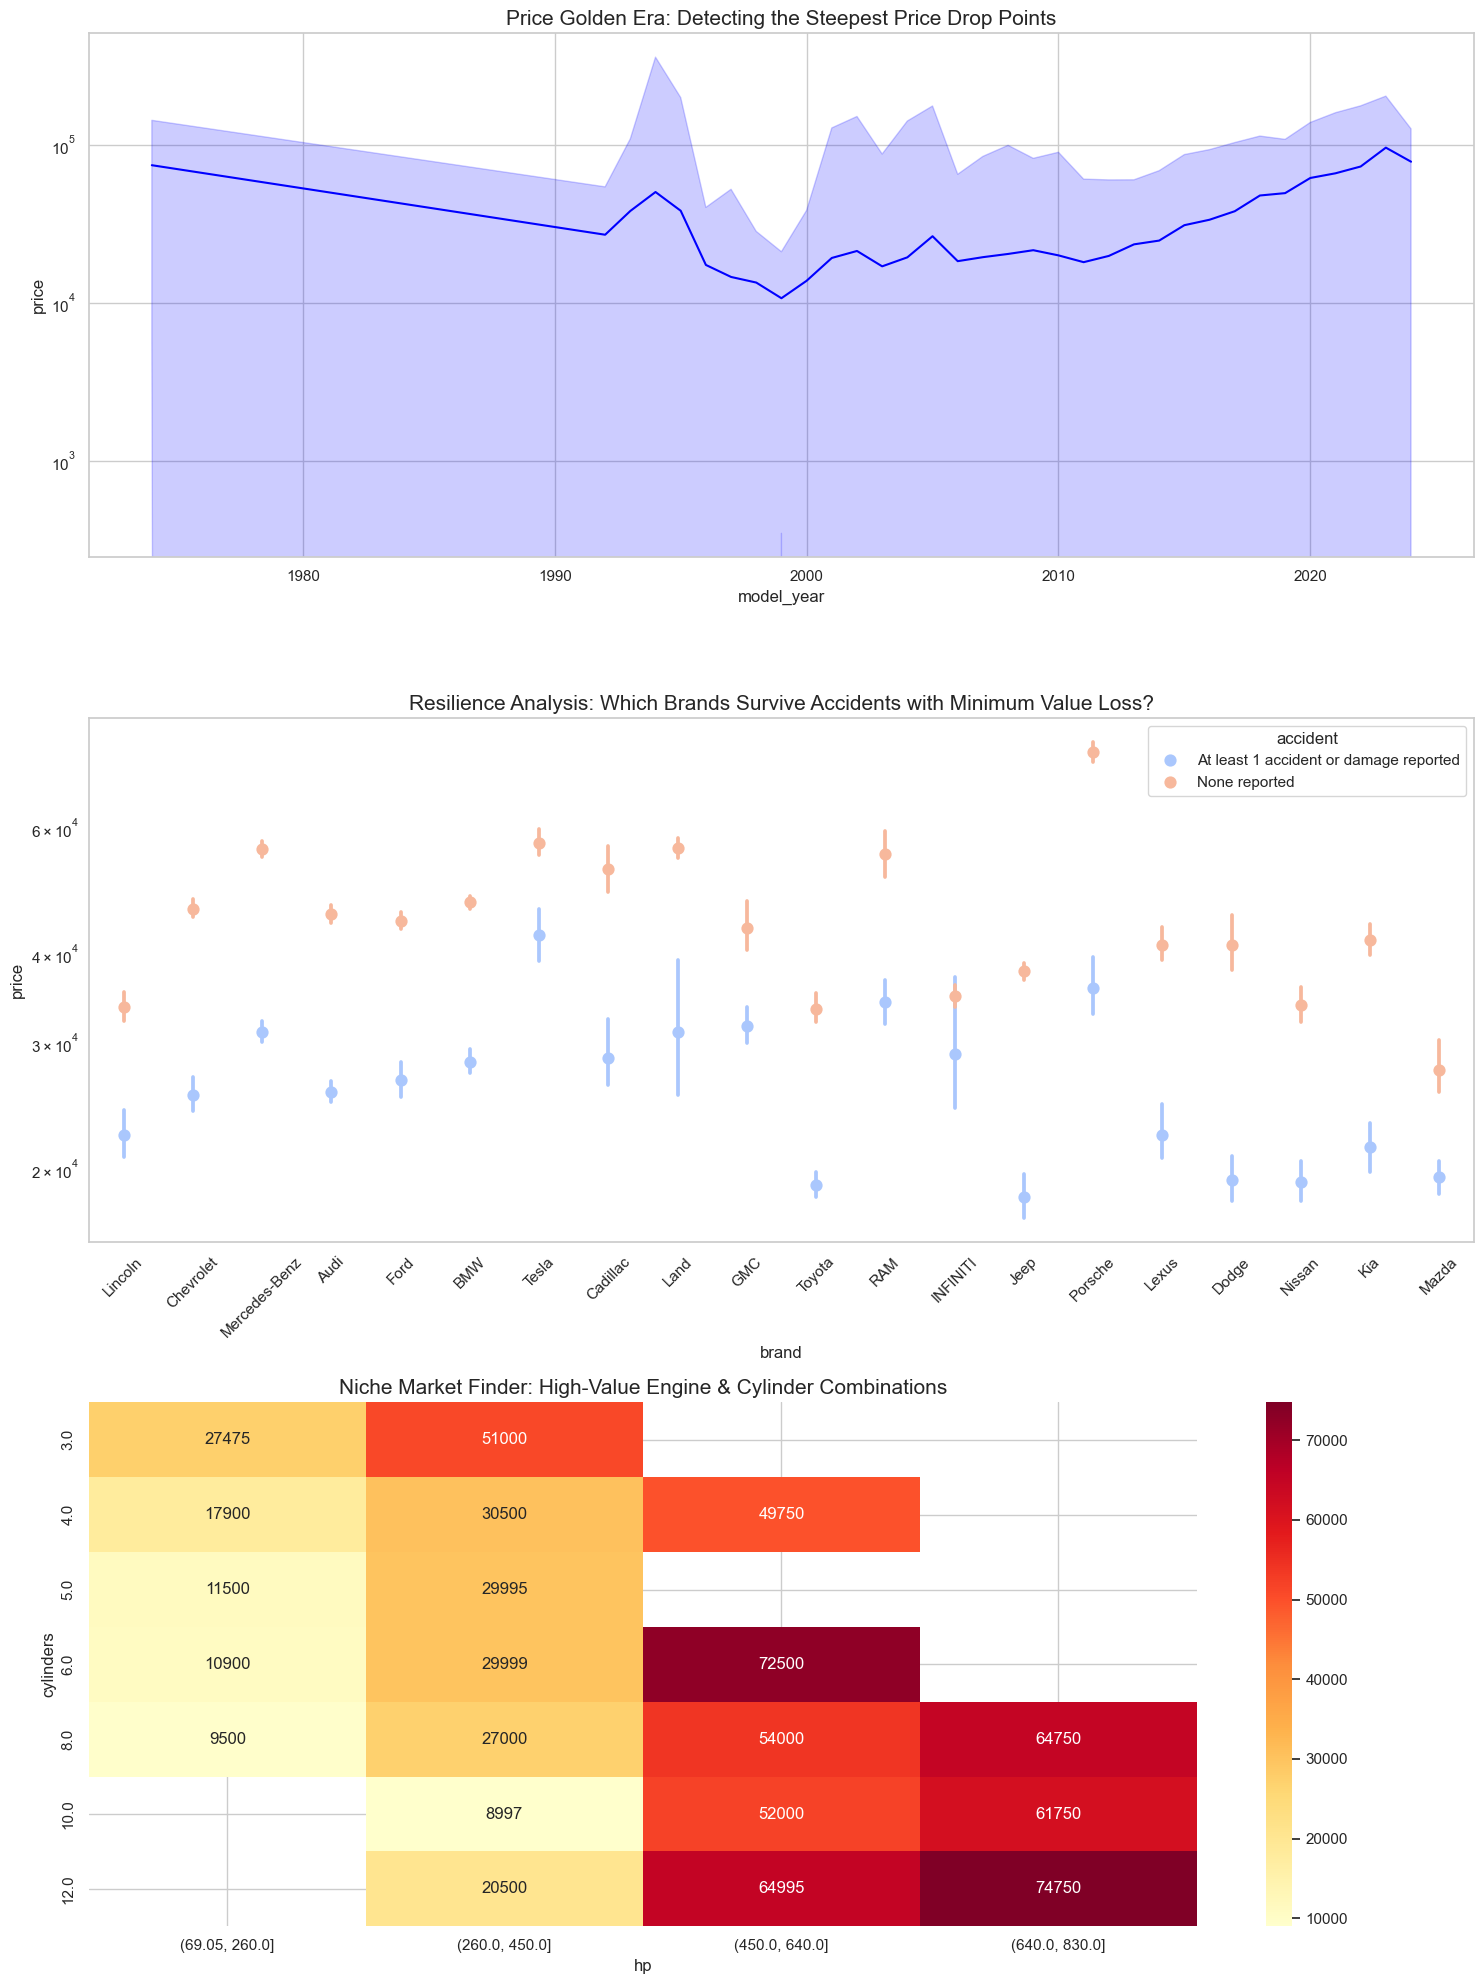

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. 데이터 로드 및 수익성 지표 생성
train = pd.read_csv('train.csv')

# 파생변수: 연식 대비 감가 속도 (이게 낮을수록 돈 되는 차)
train['age'] = 2024 - train['model_year']
train['depreciation_index'] = train['milage'] / (train['age'] + 1)

# 2. 레이아웃 파괴: 3행 1열 배치 (세로로 깊게 분석)
fig, axes = plt.subplots(3, 1, figsize=(15, 20))
sns.set_theme(style="whitegrid")

# [Insight 1] Sweet Spot: 연식 vs 가격의 비선형 관계
# 가격이 급격히 꺾이는 구간(Golden Time)을 찾습니다. 
# 중고차 매매업자들은 보통 이 꺾이기 직전에 차를 팝니다.
sns.lineplot(data=train, x='model_year', y='price', ax=axes[0], color='blue', errorbar='sd')
axes[0].set_title('Price Golden Era: Detecting the Steepest Price Drop Points', fontsize=15)
axes[0].set_yscale('log')

# [Insight 2] Brand x Accident Interaction (Risk vs Reward)
# "사고가 나도 가격 방어가 잘 되는 브랜드" vs "사고 나면 폐차값 수준인 브랜드"를 비교합니다.
# 사고 차를 싸게 사서 고쳐 팔 때 수익이 극대화되는 브랜드를 찾을 수 있습니다.
top_20_brands = train['brand'].value_counts().head(20).index
sns.pointplot(data=train[train['brand'].isin(top_20_brands)], 
              x='brand', y='price', hue='accident', ax=axes[1], join=False, palette='coolwarm')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_title('Resilience Analysis: Which Brands Survive Accidents with Minimum Value Loss?', fontsize=15)
axes[1].set_yscale('log')

# [Insight 3] Engine Capacity Density (Niche Market)
# 마력(HP)과 기통 수(Cylinder) 조합 중 매물은 적은데 가격은 높은 '블루오션' 구간을 찾습니다.
train['hp'] = train['engine'].str.extract('(\d+\.?\d*)HP').astype(float)
train['cylinders'] = train['engine'].str.extract('(\d+) Cylinder').astype(float)
heatmap_data = train.pivot_table(index='cylinders', columns=pd.cut(train['hp'], 5), values='price', aggfunc='median')
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlOrRd', ax=axes[2])
axes[2].set_title('Niche Market Finder: High-Value Engine & Cylinder Combinations', fontsize=15)

plt.tight_layout()
plt.show()

C:\Users\jinmg\AppData\Local\Temp\ipykernel_26896\2229316757.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train[train['price'] < train['price'].quantile(0.95)],


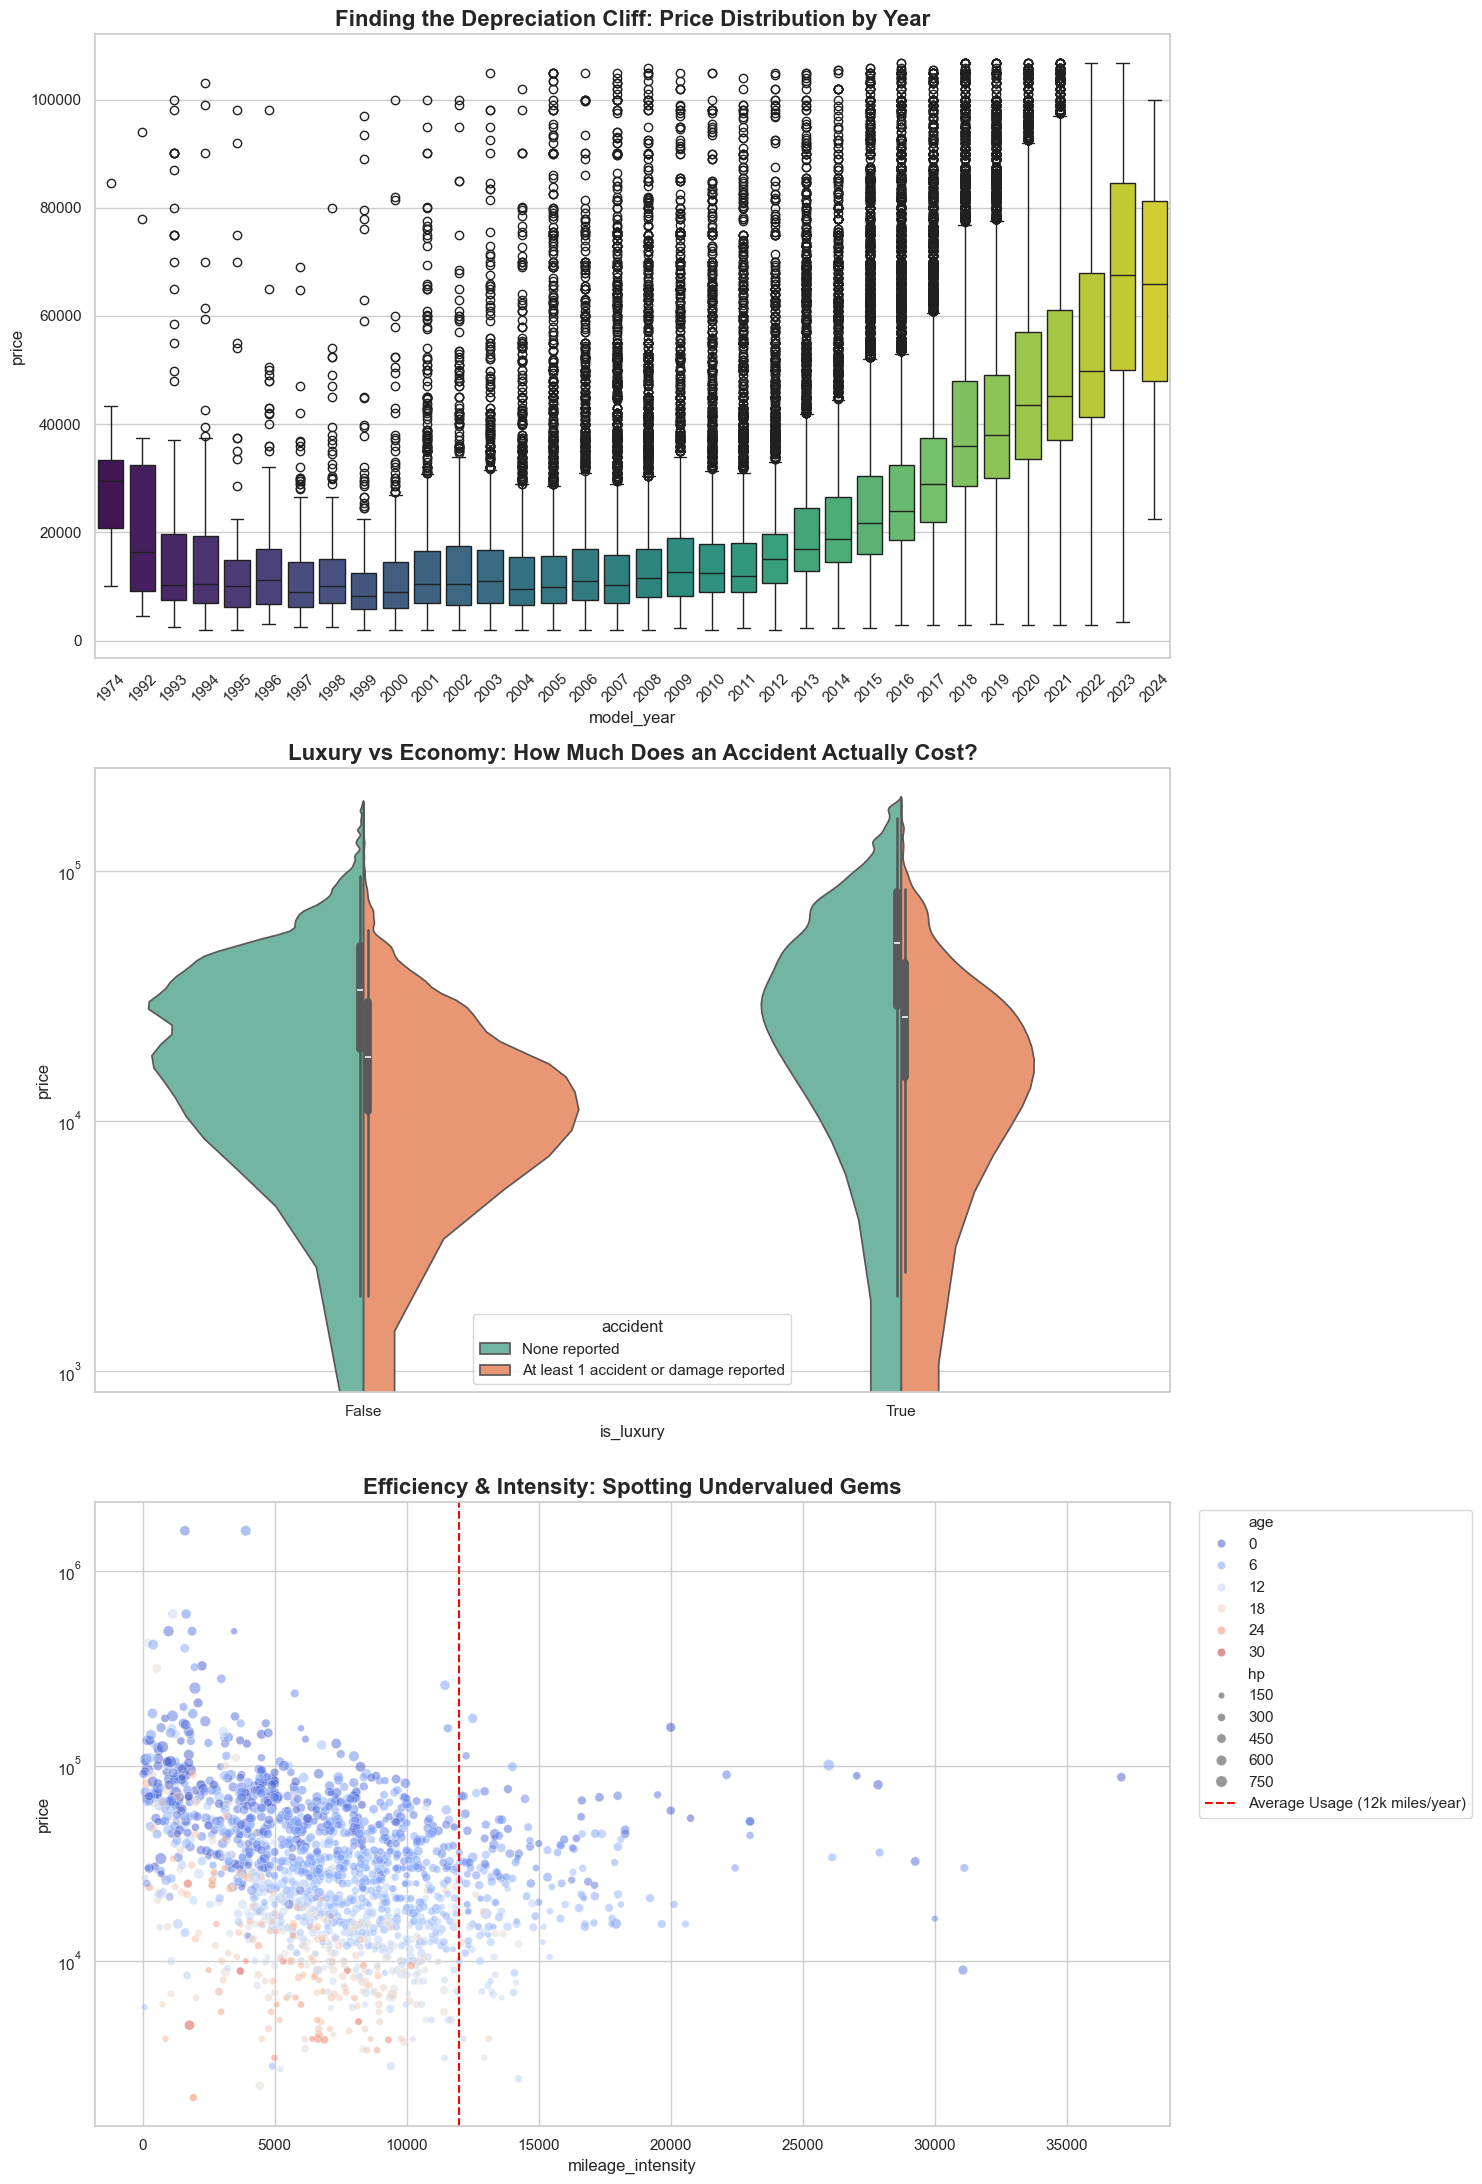

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. 데이터 로드 및 파생 변수 엔지니어링
train = pd.read_csv('train.csv')

# [지표 1] 연식 대비 주행 강도 (보통 연 1.5만마일 이상이면 '혹사'로 간주)
train['age'] = 2024 - train['model_year']
train['mileage_intensity'] = train['milage'] / (train['age'] + 1)

# [지표 2] 엔진 스펙 수치화 (마력 추출)
train['hp'] = train['engine'].str.extract('(\d+\.?\d*)HP').astype(float)

# [지표 3] 럭셔리 브랜드 태그 (평균가 상위 브랜드 그룹화)
luxury_brands = ['Lamborghini', 'Bentley', 'Ferrari', 'Porsche', 'McLaren', 'Rolls-Royce']
train['is_luxury'] = train['brand'].isin(luxury_brands)

# 2. 레이아웃: 3행 1열 배치 (시각적 깊이 우선)
fig, axes = plt.subplots(3, 1, figsize=(15, 22))
sns.set_theme(style="white")

# [Perspective 1] The "Depreciation Cliff" (연식별 가격 방어력)
# 특정 연도에서 가격이 수직 낙하하는 '클리프' 구간을 찾습니다.
sns.boxplot(data=train[train['price'] < train['price'].quantile(0.95)], 
            x='model_year', y='price', ax=axes[0], palette='viridis')
axes[0].set_title('Finding the Depreciation Cliff: Price Distribution by Year', fontsize=16, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)

# [Perspective 2] Accident Impact by Car Value (사고의 상대적 감가)
# 일반차 vs 럭셔리차에서 사고 이력이 가격을 얼마나 깎아먹는지 비교 (돈이 되는 틈새시장 확인)
sns.violinplot(data=train[train['price'] < train['price'].quantile(0.98)], 
               x='is_luxury', y='price', hue='accident', split=True, ax=axes[1], palette='Set2')
axes[1].set_title('Luxury vs Economy: How Much Does an Accident Actually Cost?', fontsize=16, fontweight='bold')
axes[1].set_yscale('log')

# [Perspective 3] The Sweet Spot: Mileage Intensity vs Price (Regression Line)
# 연식 대비 적게 탄 차(Low Intensity)가 실제 가격 프리미엄을 얼마나 받는지 확인
sns.scatterplot(data=train.sample(2000), x='mileage_intensity', y='price', 
                hue='age', size='hp', alpha=0.5, ax=axes[2], palette='coolwarm')
# 기준선 추가: 시장 평균 주행 강도 (약 12,000마일)
axes[2].axvline(x=12000, color='red', linestyle='--', label='Average Usage (12k miles/year)')
axes[2].set_title('Efficiency & Intensity: Spotting Undervalued Gems', fontsize=16, fontweight='bold')
axes[2].set_yscale('log')
axes[2].legend(bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [21]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor

# 1. 데이터 로드
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# 2. 전처리 함수 보강
def preprocess_for_catboost(df):
    # (1) 범주형 컬럼들 추출
    cat_cols = df.select_dtypes(include=['object']).columns.tolist()
    
    # (2) 범주형 데이터 에러 방지: 결측치 채우고 문자열로 변환
    for col in cat_cols:
        df[col] = df[col].fillna('Unknown').astype(str)
    
    # (3) 수치형 결측치 처리
    num_cols = df.select_dtypes(exclude=['object']).columns.tolist()
    for col in num_cols:
        df[col] = df[col].fillna(0)
        
    # (4) EDA에서 찾은 파생 변수 추가
    df['age'] = 2024 - df['model_year']
    df['mileage_intensity'] = df['milage'] / (df['age'] + 1)
    
    return df, cat_cols

# 데이터 적용
train, cat_features = preprocess_for_catboost(train)
test, _ = preprocess_for_catboost(test)

# 3. 학습 데이터 준비
y_train_log = np.log1p(train['price'])
X_train = train.drop(['id', 'price'], axis=1)
X_test = test.drop(['id'], axis=1)

# 4. 모델 학습 (에러 방지 옵션 추가)
model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    cat_features=cat_features, # 여기서 위에서 추출한 리스트 사용
    allow_writing_files=False, # 권한 에러 방지
    verbose=100
)

try:
    print("🚀 학습을 시작합니다...")
    model.fit(X_train, y_train_log)
    
    # 5. 예측 및 제출 파일 저장
    preds = np.expm1(model.predict(X_test))
    submission = pd.DataFrame({'id': test['id'], 'price': preds})
    submission.to_csv('submission.csv', index=False)
    print("✅ 성공! 'submission.csv'가 생성되었습니다.")
    
except Exception as e:
    print(f"❌ 에러 발생: {e}")

C:\Users\jinmg\AppData\Local\Temp\ipykernel_26896\1109343847.py:12: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_cols = df.select_dtypes(include=['object']).columns.tolist()
C:\Users\jinmg\AppData\Local\Temp\ipykernel_26896\1109343847.py:12: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs

🚀 학습을 시작합니다...
0:	learn: 0.8207425	total: 303ms	remaining: 5m 2s
100:	learn: 0.5059505	total: 15.3s	remaining: 2m 16s
200:	learn: 0.4997195	total: 31s	remaining: 2m 3s
300:	learn: 0.4960056	total: 46.5s	remaining: 1m 47s
400:	learn: 0.4933974	total: 1m 3s	remaining: 1m 34s
500:	learn: 0.4916310	total: 1m 19s	remaining: 1m 19s
600:	learn: 0.4902899	total: 1m 37s	remaining: 1m 4s
700:	learn: 0.4889010	total: 1m 54s	remaining: 48.9s
800:	learn: 0.4877653	total: 2m 14s	remaining: 33.5s
900:	learn: 0.4867384	total: 2m 34s	remaining: 16.9s
999:	learn: 0.4857921	total: 2m 51s	remaining: 0us
✅ 성공! 'submission.csv'가 생성되었습니다.


In [4]:
import pandas as pd
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

# 1. 데이터 로드
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# 2. 에러 방지용 전처리
def clean_preprocess(df):
    df['age'] = 2024 - df['model_year']
    df['milage_per_year'] = df['milage'] / (df['age'] + 1)
    
    # 범주형 데이터 처리 (가장 안전한 방식: 전부 문자열로 변환 후 category 타입 지정)
    cat_cols = ['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']
    for col in cat_cols:
        df[col] = df[col].fillna('Unknown').astype('category')
    
    return df, cat_cols

train, cat_features = clean_preprocess(train)
test, _ = clean_preprocess(test)

X = train.drop(['id', 'price'], axis=1)
y_log = np.log1p(train['price'])
X_test = test.drop(['id'], axis=1)

# 3. 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(X, y_log, test_size=0.2, random_state=42)

# 4. LightGBM 모델 (에러 유발 요소 제거 및 속도 최적화)
model = LGBMRegressor(
    n_estimators=1500,       # 1~2분 내외로 끝나는 적절한 양
    learning_rate=0.05,
    num_leaves=63,           # 표현력을 위해 살짝 높임
    random_state=42,
    n_jobs=-1,
    importance_type='gain'
)

print("🚀 초고속 학습 시작 (예상 소요 시간: 1~3분)...")

# 'callbacks'를 제거하고 가장 기본적인 fit 명령어를 사용합니다.
model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    categorical_feature=cat_features
)

# 5. 예측 및 제출 파일 생성
print("🎯 예측 및 파일 생성 중...")
final_preds = np.expm1(model.predict(X_test))
submission = pd.DataFrame({'id': test['id'], 'price': final_preds})
submission.to_csv('submission.csv', index=False)

print("✅ 완료! 'submission.csv'를 제출하세요.")

🚀 초고속 학습 시작 (예상 소요 시간: 1~3분)...
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007876 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3698
[LightGBM] [Info] Number of data points in the train set: 150826, number of used features: 13
[LightGBM] [Info] Start training from score 10.291542
🎯 예측 및 파일 생성 중...
✅ 완료! 'submission.csv'를 제출하세요.


In [5]:
from sklearn.metrics import r2_score

# 1. Validation 데이터에 대한 예측 (로그 스케일)
y_val_log_pred = model.predict(X_val)

# 2. 원래 가격 스케일로 복원
y_val_true = np.expm1(y_val)
y_val_pred = np.expm1(y_val_log_pred)

# 3. R2 Score 계산
r2_log = r2_score(y_val, y_val_log_pred)
r2_original = r2_score(y_val_true, y_val_pred)

print(f"📊 [Log Scale] R2 Score: {r2_log:.4f}")
print(f"💰 [Original Price Scale] R2 Score: {r2_original:.4f}")

📊 [Log Scale] R2 Score: 0.6474
💰 [Original Price Scale] R2 Score: 0.1536


In [1]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

# 1. 데이터 로드 및 전처리
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

def preprocess(df):
    df['age'] = 2024 - df['model_year']
    df['milage_per_year'] = df['milage'] / (df['age'] + 1)
    # 엔진에서 마력 추출
    df['hp'] = df['engine'].str.extract('(\d+\.?\d*)HP').astype(float).fillna(0)
    
    # 범주형 변수 결측치 처리 및 타입 변환
    cat_cols = df.select_dtypes(include=['object']).columns.tolist()
    for col in cat_cols:
        df[col] = df[col].fillna('Unknown').astype(str)
    return df, cat_cols

train, cat_features = preprocess(train)
test, _ = preprocess(test)

X = train.drop(['id', 'price'], axis=1)
y_log = np.log1p(train['price'])
X_test = test.drop(['id'], axis=1)

# 2. 5-Fold 교차 검증 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)
oof_preds = np.zeros(len(X))
test_preds = np.zeros(len(X_test))

print("🏆 5-Fold 학습 시작 (약 5~10분 소요 예정)...")

for fold, (train_idx, val_idx) in enumerate(kf.split(X, y_log)):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y_log.iloc[train_idx], y_log.iloc[val_idx]
    
    # CatBoost 모델 설정 (균형 잡힌 파라미터)
    model = CatBoostRegressor(
    iterations=800,            # 2000에서 800으로 과감히 줄임 (시간 단축 핵심)
    learning_rate=0.08,        # 횟수가 줄어든 만큼 학습 속도를 높임
    depth=6,                   # 깊이를 7에서 6으로 낮춤 (연산량 절반 감소)
    cat_features=cat_features,
    rsm=0.8,                   # 매 스텝마다 변수의 80%만 사용하여 속도 향상
    bootstrap_type='Bernoulli',# 샘플링 방식 변경으로 연산 속도 최적화
    subsample=0.8,
    early_stopping_rounds=50,
    verbose=200                # 중간 보고를 줄여 출력 부하 감소
)
    
    model.fit(X_train, y_train, eval_set=(X_val, y_val))
    
    # 예측값 합산 및 저장
    oof_preds[val_idx] = model.predict(X_val)
    test_preds += model.predict(X_test) / 5
    print(f"✅ Fold {fold+1} 완료")

# 3. 성능 평가 (R2 Score)
total_r2 = r2_score(y_log, oof_preds)
print(f"\n🔥 [CV 평균] Log-Scale R2 Score: {total_r2:.4f}")

# 4. 제출 파일 생성
final_preds = np.expm1(test_preds)
pd.DataFrame({'id': test['id'], 'price': final_preds}).to_csv('catboost_5fold_submission.csv', index=False)

C:\Users\jinmg\AppData\Local\Temp\ipykernel_10136\1749810861.py:18: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_cols = df.select_dtypes(include=['object']).columns.tolist()
C:\Users\jinmg\AppData\Local\Temp\ipykernel_10136\1749810861.py:18: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs

🏆 5-Fold 학습 시작 (약 5~10분 소요 예정)...
0:	learn: 0.8050862	test: 0.8076066	best: 0.8076066 (0)	total: 324ms	remaining: 4m 18s
200:	learn: 0.4916814	test: 0.4971599	best: 0.4971599 (200)	total: 24.8s	remaining: 1m 14s
400:	learn: 0.4857144	test: 0.4945103	best: 0.4945103 (400)	total: 50.7s	remaining: 50.4s
600:	learn: 0.4815952	test: 0.4933065	best: 0.4933065 (600)	total: 1m 39s	remaining: 32.9s
799:	learn: 0.4781339	test: 0.4924998	best: 0.4924975 (796)	total: 2m 4s	remaining: 0us

bestTest = 0.4924974869
bestIteration = 796

Shrink model to first 797 iterations.
✅ Fold 1 완료
0:	learn: 0.8061244	test: 0.8057771	best: 0.8057771 (0)	total: 113ms	remaining: 1m 30s
200:	learn: 0.4925490	test: 0.4932249	best: 0.4932249 (200)	total: 25.6s	remaining: 1m 16s
400:	learn: 0.4863372	test: 0.4911071	best: 0.4911071 (400)	total: 1m 4s	remaining: 1m 4s
600:	learn: 0.4821895	test: 0.4901001	best: 0.4901001 (600)	total: 1m 56s	remaining: 38.5s
799:	learn: 0.4787031	test: 0.4896644	best: 0.4896644 (799)	tota

In [4]:
from autogluon.tabular import TabularPredictor
import pandas as pd
import numpy as np

# 1. 데이터 로드
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

def fixed_preprocess(df):
    # 1. 파생 변수 생성
    df['age'] = 2024 - df['model_year']
    df['milage_per_year'] = df['milage'] / (df['age'] + 1)
    
    # 2. 범주형 변수 처리 (downcast 없이 가장 안전한 방식)
    cat_cols = ['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']
    
    for col in cat_cols:
        # 결측치를 먼저 채우고
        df[col] = df[col].fillna('Unknown')
        # 카테고리 타입으로 명시적 변환
        df[col] = df[col].astype('category')
        
    # 3. 데이터 타입 자동 최적화 (downcast 대신 사용)
    df = df.infer_objects()
    
    return df, cat_cols

# 적용
train, cat_features = fixed_preprocess(train)
test, _ = fixed_preprocess(test)

# 2. 타겟 로그 변환 (AutoGluon도 로그 변환을 해주면 훨씬 잘 맞힙니다)
train['price'] = np.log1p(train['price'])

# 3. 모델 학습
# time_limit: 초 단위 설정 (600 = 10분)
# presets: 'medium_quality'는 속도와 성능의 타협점입니다.
predictor = TabularPredictor(
    label='price', 
    problem_type='regression',
    eval_metric='rmse'
).fit(
    train_data=train.drop(columns=['id']),
    time_limit=600, 
    presets='medium_quality',
    num_stack_levels=0 # 스태킹을 끄면 속도가 비약적으로 빨라집니다.
)

# 4. 예측 및 복원
preds_log = predictor.predict(test.drop(columns=['id']))
final_preds = np.expm1(preds_log)

# 5. 제출 파일 생성
submission = pd.DataFrame({'id': test['id'], 'price': final_preds})
submission.to_csv('autogluon_submission.csv', index=False)

No path specified. Models will be saved in: "AutogluonModels\ag-20260211_062735"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.5.0
Python Version:     3.11.14
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26200
CPU Count:          8
Pytorch Version:    2.9.1+cpu
CUDA Version:       CUDA is not available
Memory Avail:       1.08 GB / 15.68 GB (6.9%)
Disk Space Avail:   71.67 GB / 230.93 GB (31.0%)
Presets specified: ['medium_quality']
Using hyperparameters preset: hyperparameters='default'
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "c:\Users\jinmg\scikit-learn\usedCar\AutogluonModels\ag-20260211_062735"
Train Data Rows:    188533
Train Data Columns: 13
Label Column:       price
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                 

[1000]	valid_set's rmse: 0.503391


	-0.5033	 = Validation score   (-root_mean_squared_error)
	19.78s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: LightGBM ... Training model for up to 579.61s of the 579.61s of remaining time.
	Fitting with cpus=4, gpus=0, mem=0.1/1.1 GB
	-0.5014	 = Validation score   (-root_mean_squared_error)
	5.39s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: RandomForestMSE ... Training model for up to 574.11s of the 574.10s of remaining time.
	To force training the model, specify the model hyperparameter "ag.max_memory_usage_ratio" to a larger value (currently 1.0, set to >=1.46 to avoid the error)
		To set the same value for all models, do the following when calling predictor.fit: `predictor.fit(..., ag_args_fit={"ag.max_memory_usage_ratio": VALUE})`
		Setting "ag.max_memory_usage_ratio" to values above 1 may result in out-of-memory errors. You may consider using a machine with more memory as a safer alternative.
	Not enough memory to train RandomForestMSE..

In [5]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 로드
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# 2. 전처리 (결측치 처리)
train = train.fillna('Unknown')
test = test.fillna('Unknown')

# 학습에 사용할 특성(X)과 타겟(y) 분리
X = train.drop(['id', 'price'], axis=1)
y = train['price']
X_test = test.drop(['id'], axis=1)

# 범주형 변수 리스트 지정 (CatBoost의 강력한 기능)
cat_features = ['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']

# 학습/검증 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 모델 정의 및 학습
# 과적합 방지를 위해 early_stopping 적용
model = CatBoostRegressor(
    iterations=2000,
    learning_rate=0.05,
    depth=6,
    loss_function='MAE', # 중고차 가격은 이상치가 많으므로 MAE가 유리
    cat_features=cat_features,
    random_seed=42,
    verbose=200
)

print("🚀 Training CatBoost Model...")
model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=100)

# 4.최종 예측 및 파일 저장
print("📝 Predicting test data and saving results...")
final_preds = model.predict(X_test)
test['price'] = final_preds
test[['id', 'price']].to_csv('submission.csv', index=False)
print("✅ 'submission.csv' has been saved successfully!")

🚀 Training CatBoost Model...
0:	learn: 26021.1566120	test: 25991.3871829	best: 25991.3871829 (0)	total: 203ms	remaining: 6m 46s
200:	learn: 17543.1642321	test: 17432.5138331	best: 17432.5138331 (200)	total: 33.5s	remaining: 4m 59s
400:	learn: 17303.7202680	test: 17257.4535309	best: 17257.4535309 (400)	total: 1m 10s	remaining: 4m 39s
600:	learn: 17191.9544481	test: 17192.0406985	best: 17192.0406985 (600)	total: 1m 50s	remaining: 4m 17s
800:	learn: 17111.5961963	test: 17166.3172111	best: 17166.3172111 (800)	total: 2m 33s	remaining: 3m 50s
1000:	learn: 17051.4278919	test: 17146.3531652	best: 17146.3531652 (1000)	total: 3m 22s	remaining: 3m 21s
1200:	learn: 16992.3669683	test: 17132.9860654	best: 17132.8255761 (1196)	total: 4m 12s	remaining: 2m 48s
1400:	learn: 16942.5727436	test: 17124.8375310	best: 17124.8375310 (1400)	total: 5m 3s	remaining: 2m 9s
1600:	learn: 16895.7217136	test: 17118.5943737	best: 17118.4561997 (1588)	total: 5m 54s	remaining: 1m 28s
1800:	learn: 16856.7982403	test: 17

In [7]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# 1. 데이터 로드 및 최신 Pandas 대응 전처리
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

def final_preprocess(df):
    df['age'] = 2026 - df['model_year'] # 현재 연도 기준
    df['milage_per_year'] = df['milage'] / (df['age'] + 1)
    
    # 범주형 컬럼 정의
    cat_cols = ['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']
    for col in cat_cols:
        df[col] = df[col].fillna('Unknown').astype('category')
    
    return df, cat_cols

train, cat_features = final_preprocess(train)
test, _ = final_preprocess(test)

X = train.drop(['id', 'price'], axis=1)
y_log = np.log1p(train['price'])
X_test = test.drop(['id'], axis=1)

# 검증 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(X, y_log, test_size=0.2, random_state=42)

print("🚀 3종 모델 학습 시작 (약 10-15분 소요)...")

# --- (1) CatBoost: 범주형 데이터 특화 ---
model_cat = CatBoostRegressor(
    iterations=1000, depth=7, learning_rate=0.08, 
    cat_features=cat_features, verbose=0, early_stopping_rounds=50
)
model_cat.fit(X_train, y_train, eval_set=(X_val, y_val))
preds_cat = model_cat.predict(X_test)
val_cat = model_cat.predict(X_val)
print("✅ CatBoost 학습 완료")

# --- (2) LightGBM: 수치형 및 속도 특화 ---
model_lgb = LGBMRegressor(
    n_estimators=1000, learning_rate=0.05, num_leaves=63, 
    random_state=42, n_jobs=-1
)
model_lgb.fit(X_train, y_train, eval_set=[(X_val, y_val)], categorical_feature=cat_features)
preds_lgb = model_lgb.predict(X_test)
val_lgb = model_lgb.predict(X_val)
print("✅ LightGBM 학습 완료")

# --- (3) XGBoost: 결측치 및 구조적 학습 특화 ---
model_xgb = XGBRegressor(
    n_estimators=1000, learning_rate=0.05, max_depth=7, 
    tree_method='hist', enable_categorical=True, random_state=42
)
model_xgb.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)
preds_xgb = model_xgb.predict(X_test)
val_xgb = model_xgb.predict(X_val)
print("✅ XGBoost 학습 완료")

# --- (4) 가중치 앙상블 (성능에 따라 비율 조정) ---
# 일반적으로 CatBoost의 성능이 가장 좋으므로 높은 가중치를 부여합니다.
final_val_log = (val_cat * 0.4) + (val_lgb * 0.3) + (val_xgb * 0.3)
final_preds_log = (preds_cat * 0.4) + (preds_lgb * 0.3) + (preds_xgb * 0.3)

# 검증 세트 점수 확인
r2 = r2_score(y_val, final_val_log)
print(f"\n📊 Ensemble R2 Score: {r2:.4f}")

# --- (5) 제출 파일 생성 ---
final_preds = np.expm1(final_preds_log)
submission = pd.DataFrame({'id': test['id'], 'price': final_preds})
submission.to_csv('triple_ensemble_submission.csv', index=False)
print("\n✨ 최종 제출 파일 'triple_ensemble_submission.csv' 저장 완료!")

🚀 3종 모델 학습 시작 (약 10-15분 소요)...
✅ CatBoost 학습 완료
✅ LightGBM 학습 완료
✅ XGBoost 학습 완료

📊 Ensemble R2 Score: 0.6623

✨ 최종 제출 파일 'triple_ensemble_submission.csv' 저장 완료!
